# Models implementation and performance evaluation

**IMPLEMENTATION**

In [ ]:
assessment_path = '/content/drive/MyDrive/MACHINE LEARNING AND COMPUTER VISION/ASSESSMENT' # Please replace this to your folder

**Load Dataset for KNN and SVM**

In [ ]:
from sklearn.datasets import fetch_openml
X, y = fetch_openml(name = 'mnist_784', return_X_y=True, as_frame=False)

mnist = fetch_openml('mnist_784', version=1)
data, labels = mnist['data'], mnist['target']

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.

  warn(


**Data preprocessing and Visualization**

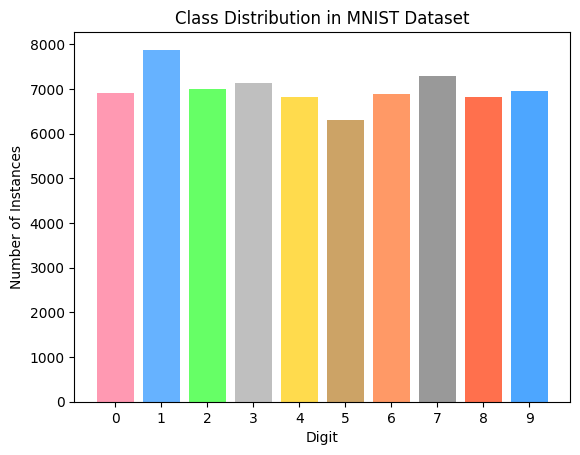

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

X_mnist_trained = X[:60000]
y_mnist_trained = y[:60000]
X_mnist_test = X[60000:]
y_mnist_test = y[60000:]

# Count the number of instances in each class
class_counts = np.bincount(y.astype(int))

# Define colors for each class
colors =  ['#FF99B2', '#66B2FF', '#66FF66', '#BFBFBF', '#FFDB4D', '#CCA366', '#FF9966', '#999999', '#FF704D', '#4DA6FF']

# Plot the class distribution
plt.bar(range(10), class_counts, tick_label=range(10), color=colors)
plt.xlabel('Digit')
plt.ylabel('Number of Instances')
plt.title('Class Distribution in MNIST Dataset')
plt.show()

In [ ]:
# CUSTOM FUNCTION
def time_converter(time_value):
  return f"{time_value: .4f} seconds" if time_value < 1.0 else time.strftime("%H:%M:%S", time.gmtime(time_value))

**K Nearest Neighbours**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.base import BaseEstimator, ClassifierMixin
import numpy as np
import time
from tqdm import tqdm
from sklearn.utils import gen_batches
import time
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import math

class KNNWithProgress(BaseEstimator, ClassifierMixin):
    def __init__(self, n_neighbors=5, n_batches=6000):
        self.n_neighbors = n_neighbors
        self.n_batches = n_batches
        self.model = KNeighborsClassifier(n_neighbors=n_neighbors)

    def fit_with_progress(self, X, y):
        n_samples = X.shape[0]
        start_time = time.time()
        self.classes_ = np.unique(y)
        a = None
        # Create a generator for batches
        batch_generator = gen_batches(n_samples, self.n_batches)

        total_iterations = sum(1 for _ in batch_generator)
        print('total_iterations: ', total_iterations)
        with tqdm(total=total_iterations, desc="Training") as pbar:
            batch_generator = gen_batches(n_samples, self.n_batches)  # Reset generator
            for _ in range(total_iterations):
                batch_slice = next(batch_generator)
                X_batch, y_batch = X[batch_slice], y[batch_slice]
                print(batch_slice)
                self.model.fit(X_batch, y_batch)
                pbar.update(1)

        return self

    def fit(self, X, y):
      start_time = time.time()
      self.model.fit(X, y)
      training_time = time.time() - start_time
      print(f'Finish training after: {time_converter(training_time)}')

    def predict_with_progress(self, X):
        n_samples=X.shape[0]
        start_time = time.time()
        y_pred = []
        # Create a generator for batches
        batch_generator = gen_batches(n_samples, self.n_batches)

        total_iterations = sum(1 for _ in batch_generator)

        with tqdm(total=total_iterations, desc="Predicting") as pbar:
            batch_generator = gen_batches(n_samples, self.n_batches)  # Reset generator
            for _ in range(total_iterations):
                batch_slice = next(batch_generator)
                X_batch = X[batch_slice]
                y_pred.extend(self.model.predict(X_batch))
                pbar.update(1)

        predicting_time = time.time() - start_time
        print(f"Predicting complete. | Time: {time_converter(predicting_time)}\n")
        return y_pred

    def predict(self, X):
      return self.model.predict(X)

# Create and train the custom KNN model
neighbors_value = list(range(1, 10))

# Create plotting metrics
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
y_knn_pred_list = []

for n_neigbors in neighbors_value:
  print(f"Training & Predicting for {n_neigbors} neighbors")
  knn_model = KNNWithProgress(n_neighbors=n_neigbors)
  knn_model.fit(X_mnist_trained, y_mnist_trained)
  # Make predictions
  y_knn_pred = knn_model.predict_with_progress(X_mnist_test)
  y_knn_pred_list.append(y_knn_pred)
  # Evaluate
  accuracy_scores.append(accuracy_score(y_mnist_test, y_knn_pred))
  precision_scores.append(precision_score(y_mnist_test, y_knn_pred, average='weighted', zero_division=1))
  recall_scores.append(recall_score(y_mnist_test, y_knn_pred, average='weighted'))
  f1_scores.append(f1_score(y_mnist_test, y_knn_pred, average='weighted'))

Training & Predicting for 1 neighbors

Finish training after:  0.2147 seconds


Predicting: 100%|██████████| 2/2 [00:24<00:00, 12.34s/it]


Predicting complete. | Time: 00:00:24



Training & Predicting for 2 neighbors

Finish training after:  0.2559 seconds


Predicting: 100%|██████████| 2/2 [00:23<00:00, 11.74s/it]


Predicting complete. | Time: 00:00:23



Training & Predicting for 3 neighbors

Finish training after:  0.2058 seconds


Predicting: 100%|██████████| 2/2 [00:24<00:00, 12.44s/it]


Predicting complete. | Time: 00:00:24



Training & Predicting for 4 neighbors

Finish training after:  0.2572 seconds


Predicting: 100%|██████████| 2/2 [00:24<00:00, 12.04s/it]


Predicting complete. | Time: 00:00:24



Training & Predicting for 5 neighbors

Finish training after:  0.2840 seconds


Predicting: 100%|██████████| 2/2 [00:23<00:00, 11.70s/it]


Predicting complete. | Time: 00:00:23



Training & Predicting for 6 neighbors

Finish training after:  0.2585 seconds


Predicting: 100%|██████████| 2/2 [00:24<00:00, 12.36s/it]


Predicting complete. | Time: 00:00:24



Training & Predicting for 7 neighbors

Finish training after:  0.2045 seconds


Predicting: 100%|██████████| 2/2 [00:24<00:00, 12.25s/it]


Predicting complete. | Time: 00:00:24



Training & Predicting for 8 neighbors

Finish training after:  0.2760 seconds


Predicting: 100%|██████████| 2/2 [00:25<00:00, 12.63s/it]


Predicting complete. | Time: 00:00:25



Training & Predicting for 9 neighbors

Finish training after:  0.2080 seconds


Predicting: 100%|██████████| 2/2 [00:24<00:00, 12.06s/it]


Predicting complete. | Time: 00:00:24




**Support Virtual Machine**

In [ ]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import seaborn as sns
from sklearn import metrics
from tqdm import tqdm
import time
from sklearn.metrics import confusion_matrix

# Initialize the SVM classifier
svm = SVC()

start_time = time.time()
print(f'Start time: {time_converter(start_time)}')
svm.fit(X_mnist_trained, y_mnist_trained)
end_time = time.time()
training_time = end_time - start_time
print(f'Finish at: {time_converter(end_time)}')
print(f'Finish training after: {time_converter(training_time)}')

# Make predictions on the testing data
y_svm_pred = svm.predict(X_mnist_test)

# Final evaluation on the test set
final_accuracy = metrics.accuracy_score(y_mnist_test, y_svm_pred)
print(f"\nFinal Accuracy on Test Set: {final_accuracy:.4f}")

Start time: 15:05:48

Finish at: 15:09:39

Finish training after: 00:03:50



Final Accuracy on Test Set: 0.9792


**Neural Networks**

**Data Visualization**


11490434/11490434 [==============================] - 0s 0us/step

Digit 0: 5923

Digit 1: 6742

Digit 2: 5958

Digit 3: 6131

Digit 4: 5842

Digit 5: 5421

Digit 6: 5918

Digit 7: 6265

Digit 8: 5851

Digit 9: 5949


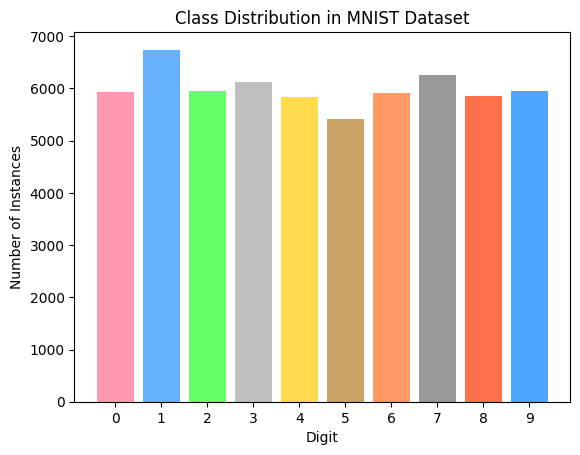

In [ ]:
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

# Load the MNIST dataset
(x_train, y_train), (_, _) = mnist.load_data()

# Count the number of instances in each class
class_counts = np.bincount(y_train)

# Display the class counts
for digit, count in enumerate(class_counts):
    print(f"Digit {digit}: {count}")

colors = ['#FF99B2', '#66B2FF', '#66FF66', '#BFBFBF', '#FFDB4D', '#CCA366', '#FF9966', '#999999', '#FF704D', '#4DA6FF']

# Plot the class distribution
plt.bar(range(10), class_counts, tick_label=range(10), color=colors)
plt.xlabel('Digit')
plt.ylabel('Number of Instances')
plt.title('Class Distribution in MNIST Dataset')
plt.show()

**Multilayer Perceptron**

In [ ]:
from keras import layers, models
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns
# Load and preprocess the MNIST dataset
(x_mlp_train, y_keras_train), (x_mlp_test, y_keras_test) = mnist.load_data()
x_mlp_train, x_mlp_val, y_keras_train, y_keras_val = train_test_split(x_mlp_train, y_keras_train, test_size=0.1, random_state=42)

# Reshape and normalize the input data
x_mlp_train = x_mlp_train.reshape((x_mlp_train.shape[0], -1)) / 255.0
x_mlp_val = x_mlp_val.reshape((x_mlp_val.shape[0], -1)) / 255.0
x_mlp_test = x_mlp_test.reshape((x_mlp_test.shape[0], -1)) / 255.0

# One-hot encode the labels
y_keras_train = to_categorical(y_keras_train)
y_keras_val = to_categorical(y_keras_val)
y_keras_test = to_categorical(y_keras_test)

# Build the MLP model
mlp_model = models.Sequential()
mlp_model.add(layers.Dense(128, activation='relu', input_shape=(784,)))
mlp_model.add(layers.Dropout(0.2))
mlp_model.add(layers.Dense(64, activation='relu'))
mlp_model.add(layers.Dropout(0.2))
mlp_model.add(layers.Dense(10, activation='softmax'))

# Compile the model
mlp_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
history = mlp_model.fit(x_mlp_train, y_keras_train, epochs=30, batch_size=256, validation_data=(x_mlp_val, y_keras_val), callbacks=[early_stopping])

# Make predictions on the test set
print("Predicting")
y_mlp_pred = mlp_model.predict(x_mlp_test)

# Convert one-hot encoded predictions to class labels
y_mlp_pred_labels = np.argmax(y_mlp_pred, axis=1)
y_keras_true_labels = np.argmax(y_keras_test, axis=1)


Epoch 1/30

211/211 [==============================] - 7s 6ms/step - loss: 0.6078 - accuracy: 0.8169 - val_loss: 0.2141 - val_accuracy: 0.9367

Epoch 2/30

211/211 [==============================] - 1s 4ms/step - loss: 0.2478 - accuracy: 0.9274 - val_loss: 0.1495 - val_accuracy: 0.9553

Epoch 3/30

211/211 [==============================] - 1s 5ms/step - loss: 0.1888 - accuracy: 0.9441 - val_loss: 0.1252 - val_accuracy: 0.9617

Epoch 4/30

211/211 [==============================] - 1s 6ms/step - loss: 0.1537 - accuracy: 0.9544 - val_loss: 0.1084 - val_accuracy: 0.9668

Epoch 5/30

211/211 [==============================] - 1s 6ms/step - loss: 0.1350 - accuracy: 0.9592 - val_loss: 0.0981 - val_accuracy: 0.9697

Epoch 6/30

211/211 [==============================] - 1s 6ms/step - loss: 0.1178 - accuracy: 0.9650 - val_loss: 0.0865 - val_accuracy: 0.9750

Epoch 7/30

211/211 [==============================] - 1s 4ms/step - loss: 0.1064 - accuracy: 0.9680 - val_loss: 0.0788 - val_accuracy: 

**Linear Deep Neural Network**

In [ ]:
from keras import layers, models
from keras.datasets import mnist
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Load and preprocess the MNIST dataset
(x_dnn_train, y_keras_train), (x_dnn_test, y_keras_test) = mnist.load_data()
x_dnn_train, x_dnn_val, y_keras_train, y_keras_val = train_test_split(x_dnn_train, y_keras_train, test_size=0.1, random_state=42)

# Reshape and normalize the input data
x_dnn_train = x_dnn_train.reshape((x_dnn_train.shape[0], -1)) / 255.0
x_dnn_val = x_dnn_val.reshape((x_dnn_val.shape[0], -1)) / 255.0
x_dnn_test = x_dnn_test.reshape((x_dnn_test.shape[0], -1)) / 255.0

# One-hot encode the labels
y_keras_train = to_categorical(y_keras_train)
y_keras_val = to_categorical(y_keras_val)
y_keras_test = to_categorical(y_keras_test)

# Build the DNN model
dnn_model = models.Sequential()
dnn_model.add(layers.Dense(256, activation='relu', input_shape=(784,)))
dnn_model.add(layers.Dropout(0.3))
dnn_model.add(layers.Dense(128, activation='relu'))
dnn_model.add(layers.Dropout(0.3))
dnn_model.add(layers.Dense(64, activation='relu'))
dnn_model.add(layers.Dropout(0.3))
dnn_model.add(layers.Dense(10, activation='softmax'))

# Compile the model
dnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
history = dnn_model.fit(x_dnn_train, y_keras_train, epochs=30, batch_size=256, validation_data=(x_dnn_val, y_keras_val), callbacks=[early_stopping])

# Make predictions on the test set
print("Predicting")
y_dnn_pred = dnn_model.predict(x_dnn_test)

# Convert one-hot encoded predictions to class labels
y_dnn_pred_labels = np.argmax(y_dnn_pred, axis=1)
y_keras_true_labels = np.argmax(y_keras_test, axis=1)

# Evaluate the model on the test set
dnn_test_loss, dnn_test_accuracy = dnn_model.evaluate(x_dnn_test, y_keras_test)
print(f"Test loss: {dnn_test_loss:.4f}")
print(f'Test Accuracy: {dnn_test_accuracy * 100:.2f}%')


Epoch 1/30

211/211 [==============================] - 3s 6ms/step - loss: 0.6336 - accuracy: 0.8015 - val_loss: 0.1745 - val_accuracy: 0.9498

Epoch 2/30

211/211 [==============================] - 1s 5ms/step - loss: 0.2375 - accuracy: 0.9334 - val_loss: 0.1214 - val_accuracy: 0.9627

Epoch 3/30

211/211 [==============================] - 1s 5ms/step - loss: 0.1745 - accuracy: 0.9511 - val_loss: 0.0984 - val_accuracy: 0.9703

Epoch 4/30

211/211 [==============================] - 1s 5ms/step - loss: 0.1450 - accuracy: 0.9593 - val_loss: 0.0878 - val_accuracy: 0.9732

Epoch 5/30

211/211 [==============================] - 1s 6ms/step - loss: 0.1226 - accuracy: 0.9646 - val_loss: 0.0786 - val_accuracy: 0.9773

Epoch 6/30

211/211 [==============================] - 1s 6ms/step - loss: 0.1017 - accuracy: 0.9695 - val_loss: 0.0750 - val_accuracy: 0.9785

Epoch 7/30

211/211 [==============================] - 1s 7ms/step - loss: 0.0945 - accuracy: 0.9726 - val_loss: 0.0671 - val_accuracy: 

**Convoluational Neural Network**

**Convolutional Neural Networks** (CNNs) represent a class of deep neural networks designed for processing and analyzing visual data. Originally developed for image recognition tasks, CNNs have proven highly effective in computer vision applications, including object detection, image segmentation, and facial recognition. The architecture of CNNs is inspired by the visual processing mechanism of the human brain. We can simply say that a CNN is a smart filter for images.

DNN sctructure explained:
- There are 4 Convolutional layers with 32 filters at first and 64 filters later. These filters help the network understand different features in the pictures.

- MaxPooling simplifies the information by keeping the most important details and reducing the image size. This makes the computer's job easier and prevents it from becoming too specialized in the training data.

- Dropout is like a teacher making the network more flexible. It randomly ignores some information during learning, preventing the network from memorizing everything and making it better at understanding new images.

- The 'relu' function adds a bit of complexity by making sure only positive information is used, helping the network understand more complicated patterns.

- Finally, the network uses all this information to make predictions in two steps. First, it flattens the learned features into a simple list. Then, it uses this list to decide which number (from 0 to 9) is most likely in the image.


**Optimizer**

In this model, *categorical_crossentropy* loss function is applied to handle categorical classifications with more than two classes.

The optimizer was used is **Adam**.

**Adam** is a popular optimization algorithm in deep learning. It adapts the learning rates of each model parameter individually, making it well-suited for problems with features of different scales. It incorporates a momentum term to accelerate optimization and performs bias correction for stable updates, particularly in the early training stages. **Adam** is effective for large datasets and complex models, and its default hyperparameters are often well-tuned, making it widely used in the deep learning community.


**Learning rate reduction and why?**

To expedite the optimizer's convergence and guide it closer to the global minimum of the loss function, there is a learning rate (LR) annealing strategy. The LR determines the size of steps the optimizer takes in the loss landscape. A higher LR leads to quicker convergence, but it risks overlooking the global minimum by making large steps and possibly getting stuck in a local minimum.

To balance fast computation with a high LR and ensure more effective convergence, the LR was dynamically decreased every X steps (epochs), especially when accuracy showed no improvement. Opting to halve the LR if the accuracy did not improve after 3 epochs. This approach aims to strike a balance between rapid convergence and the precision of reaching the global minimum.

In [ ]:
import numpy as np
import keras
from keras import layers, regularizers
from keras.utils import to_categorical
from sklearn import datasets
from sklearn.metrics import auc, confusion_matrix, precision_recall_curve, average_precision_score
from sklearn.multiclass import OneVsRestClassifier
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.optimizers import Adam

# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# Load the data and split it between train, validation and test sets
(x_train, y_keras_train), (x_test, y_keras_test) = keras.datasets.mnist.load_data()
x_train, x_val, y_keras_train, y_keras_val = train_test_split(x_train, y_keras_train, test_size=0.1, random_state=42)

# Reshape and normalize the input data
x_train = x_train.reshape((x_train.shape[0], 28, 28, -1)) / 255.0
x_val = x_val.reshape((x_val.shape[0], 28, 28, -1)) / 255.0
x_test = x_test.reshape((x_test.shape[0], 28, 28, -1)) / 255.0

# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_val = np.expand_dims(x_val, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_keras_train = to_categorical(y_keras_train, num_classes)
y_keras_val = to_categorical(y_keras_val, num_classes)
y_keras_test = to_categorical(y_keras_test, num_classes)

batch_size = 128 # cnn_7: 128 - cnn_8: 64 - cnn_9: 86
epochs = 30

cnn_model = keras.Sequential(
    [
        layers.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(5, 5), activation="relu", padding='same'),
        layers.Conv2D(32, kernel_size=(5, 5), activation="relu", padding='same'),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Dropout(0.5),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu", padding='same'),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu", padding='same'),
        layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
        layers.Dropout(0.25),
        layers.Flatten(),
        layers.Dense(256, activation = "relu"),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

# Define the optimizer
optimizer = Adam()

# Data augmentation

# Set a learning rate annealer
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                            patience=3,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)


cnn_model.summary()

cnn_model.compile(
    loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"]
)


history = cnn_model.fit(
    x_train,
    y_keras_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data = (x_val, y_keras_val),
    steps_per_epoch=x_train.shape[0] // batch_size,
    callbacks=[learning_rate_reduction])

cnn_test_loss, cnn_test_accuracy= cnn_model.evaluate(x_val, y_keras_val, verbose=0)
print(f"Test loss: {cnn_test_loss:.4f}")
print(f"Test accuracy: {cnn_test_accuracy * 100:.2f}%")

from google.colab import drive
drive.mount('/content/drive')

with open(f'{assessment_path}/new_cnn_model.pkl','wb') as handle: # explain why load another file
  pickle.dump(cnn_model, handle)

x_train shape: (54000, 28, 28, 1, 1)

54000 train samples

10000 test samples

Model: "sequential_4"

_________________________________________________________________

 Layer (type)                Output Shape              Param #   


 conv2d_8 (Conv2D)           (None, 28, 28, 32)        832       

                                                                 

 conv2d_9 (Conv2D)           (None, 28, 28, 32)        25632     

                                                                 

 max_pooling2d_4 (MaxPoolin  (None, 14, 14, 32)        0         

 g2D)                                                            

                                                                 

 dropout_11 (Dropout)        (None, 14, 14, 32)        0         

                                                                 

 conv2d_10 (Conv2D)          (None, 14, 14, 64)        18496     

                                                                 

 conv2d_11 (Conv2D)       

**PERFORMANCE EVALUATION**

**Confusion matrix**

A **confusion matrix** is a matrix that summarizes the performance of a Machine Learning model on a set of test data. It is often used to measure the performance of classification models, which aim to predict a categorical label for each input instance. The matrix displays the number of **true positives (TP), true negatives (TN), false positives (FP), and false negatives (FN)** produced by the model on the test data.

To evaluate the performance of a Machine Learning model, we can  use the **Confusion Matrix** (CF) or Table of Confusion as a reference in order to visualize the metrics easily without having so many other kinds of plots that would give some confusion if we do not have the knowledge about what the plot is trying to show. Using CF along with other plots are not a bad idea, but in this case, only CF is good enough.

**What is True/False Positive and Negative?**

**True Positive (TP)**  is the total counts having both predicted and actual values are a label.\
**True Negative (TN)** is the total counts having both predicted and actual values are **Not** a label.\
**False Positive (FP)** is the total counts having prediction is a label while actually **Not** a label.\
**False Negative (FN)** is the total counts having prediction is **Not** a label while actually, it is  a label.

**Example**

For example, let's say we have some fire prediction.\
**True Positive** means there was a fire and the fire alarm rang correctly to tell people about it. \
Meanwhile, **True Negative** means there was no fire and the fire alarm would not ring at all, just kept silence as usual.


**False Positive** means that there was no fire but with some misunderstanding somewhere in the prediction, the fire alarm thought it was fire and rang to tell everybody about it. And **False Negative** is really dangerous in this case, there was no fire alarm meanwhile it was actually on fire.

**K Nearest Neighhbours**

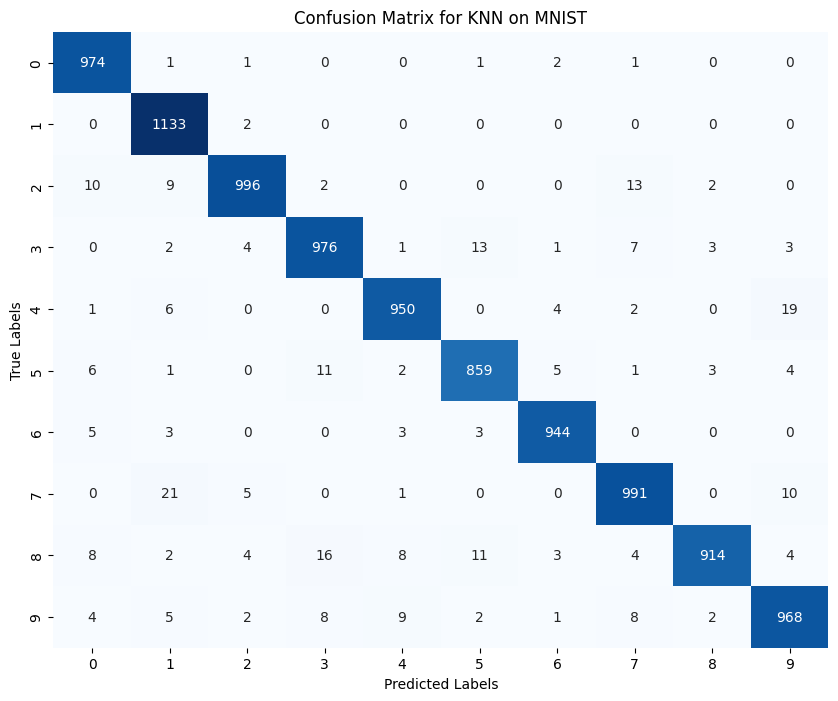

<ipython-input-14-4e39ff2fe8a1>:30: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.

  plt.subplot(12, 5, miss_count + 1)


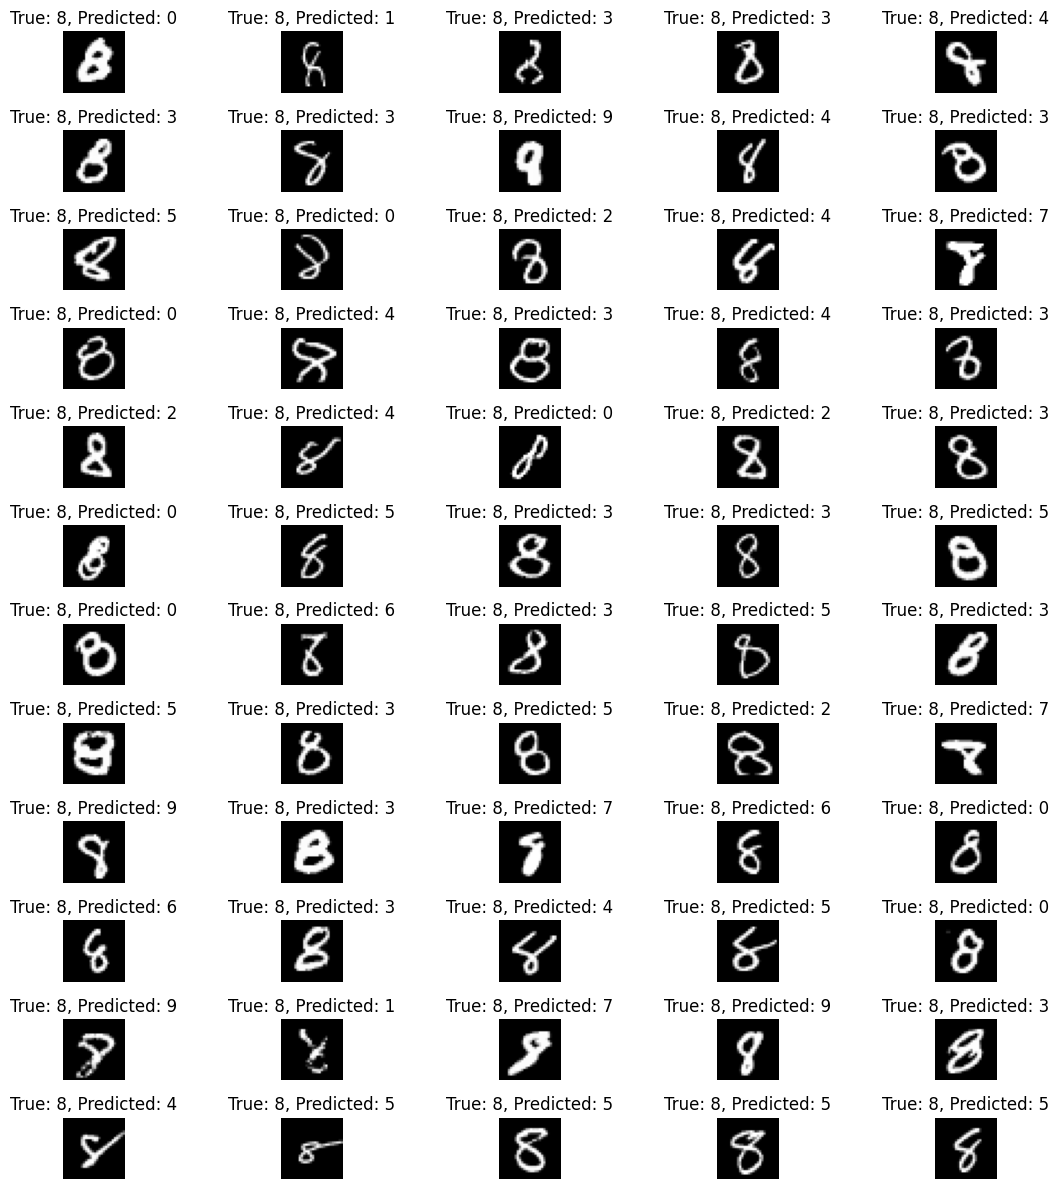

In [ ]:
import numpy as np

y_knn_pred_eval = y_knn_pred_list[2]

conf_matrix = confusion_matrix(y_mnist_test, y_knn_pred_eval)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix for KNN on MNIST')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Number of classes (assuming digits 0 to 9)
num_classes = 10

# One-hot encode for digit 4
digit_4_one_hot = np.zeros(num_classes)
digit_4_one_hot[4] = 1

# Find indices of misclassified instances
misclassified_indices = np.where(y_knn_pred_eval != y_mnist_test)[0]
# Display some of the misclassified instances
plt.figure(figsize=(12, 12))
miss_count = 0

for i, idx in enumerate(misclassified_indices):
  if y_mnist_test[idx] == '8':
    plt.subplot(12, 5, miss_count + 1)
    miss_count+=1
    plt.imshow(X_mnist_test[idx].reshape(28, 28), cmap='gray')
    plt.title(f'True: {y_mnist_test[idx]}, Predicted: {y_knn_pred_eval[idx]}')
  plt.axis('off')

plt.tight_layout()
plt.show()

As can be seen from the Matrix, digit 8 is the class that has the highest False Positive so we are going to use this class in this case for the evaluation.
Refer to the confusion matrix, the digit 8 would be easy to get misunderstood as the other number especially the number 3 because their shape look similar in occasion. The confusion would come along with the misunderstanding of the model between digit 8 and digit 4 and 5. They do not have much similar in the shape, may be, the posistion of the pixel in each image has been related.

We will compare True Positive of '8' to the total time digits are predicted as '8' which is contain both True Positive and False Positive (for the digits were predicted as 8) value. In this case, the metric is really good, TP/(TP+FPe) = 914 / (914 + 18) = 0.9807, but with the digit  9, it is not that good when many digits got understood as a 9 like number 4 or number 7 due to their shapes are similar and we have TP/(TP+FPn) = 968 / (968 + 49) = 0.9518.

The metric is near to 1 (this can be observed from confusion matrix) which means the KNN is quite good with this task when we validate it with the test set we have.

**Support Virtual Machine**

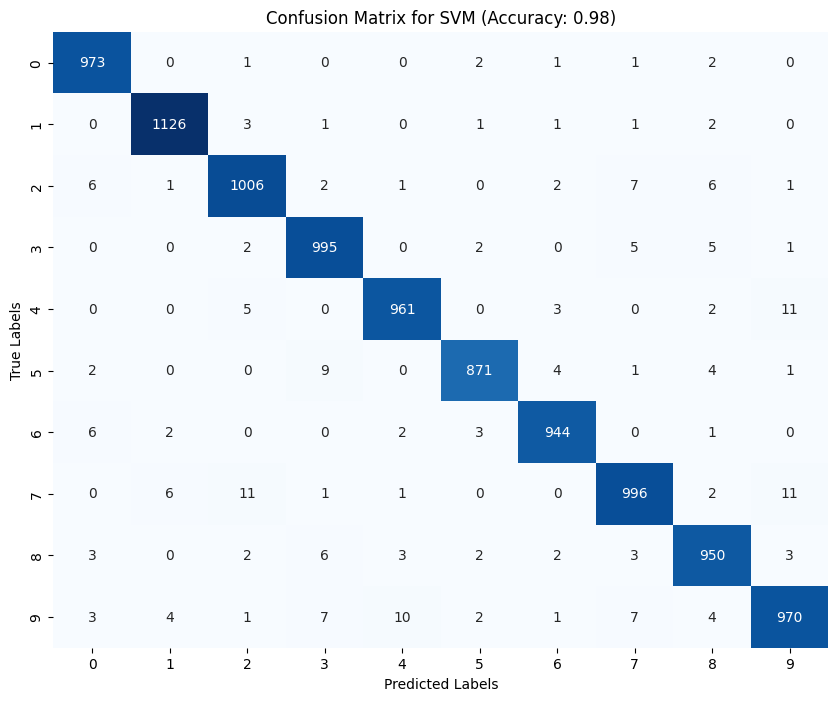

<ipython-input-15-7de4bb5b6406>:28: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.

  plt.subplot(8, 5, miss_count + 1)


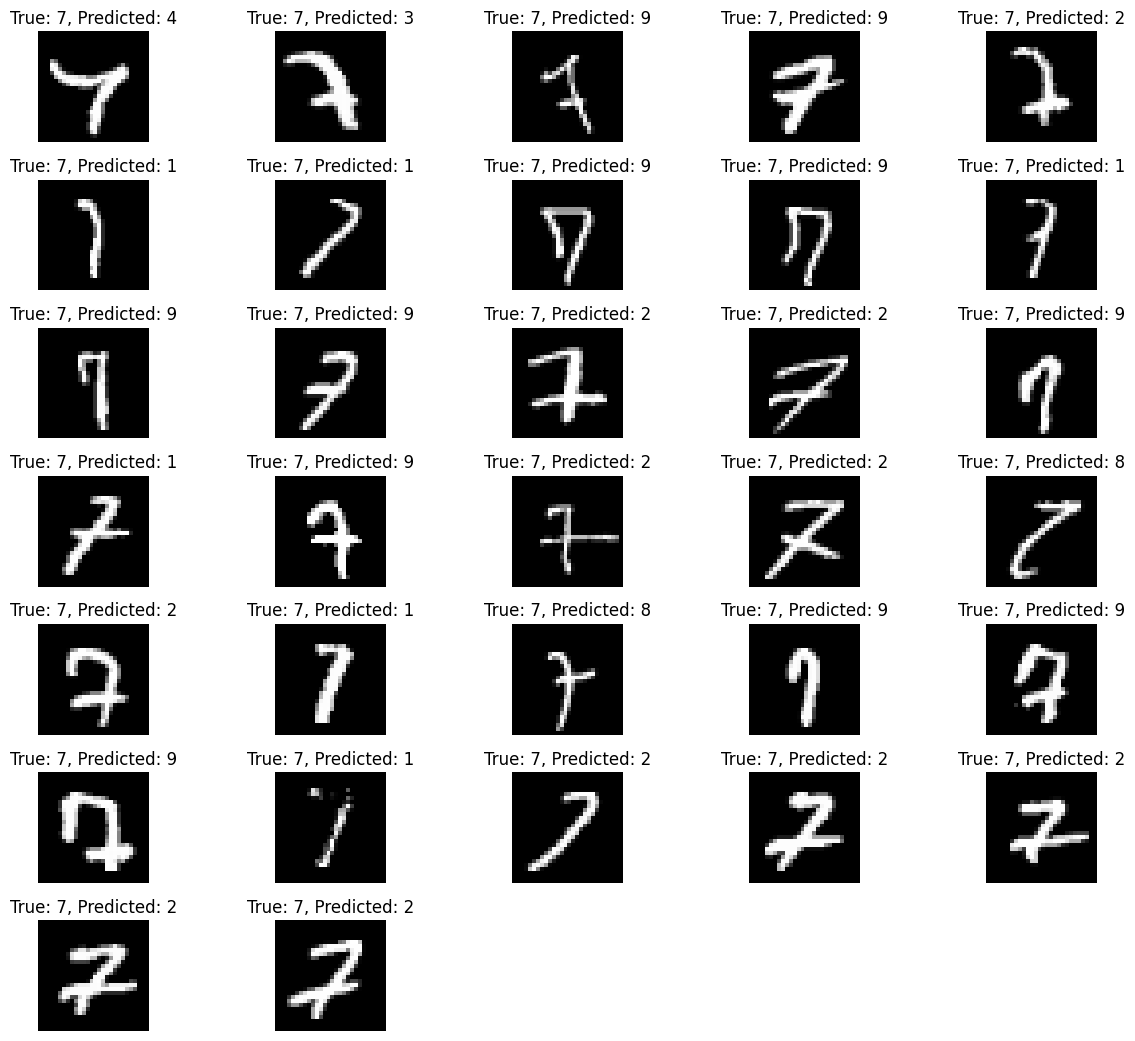

In [ ]:
import numpy as np

conf_matrix = confusion_matrix(y_mnist_test, y_svm_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title(f'Confusion Matrix for SVM (Accuracy: {final_accuracy:.2f})')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Number of classes (assuming digits 0 to 9)
num_classes = 10

# One-hot encode for digit 4
digit_4_one_hot = np.zeros(num_classes)
digit_4_one_hot[4] = 1

# Find indices of misclassified instances
misclassified_indices = np.where(y_svm_pred != y_mnist_test)[0]
# Display some of the misclassified instances
plt.figure(figsize=(12, 12))
miss_count = 0

for i, idx in enumerate(misclassified_indices):
  if y_mnist_test[idx] == '7':
    plt.subplot(8, 5, miss_count + 1)
    miss_count+=1
    plt.imshow(X_mnist_test[idx].reshape(28, 28), cmap='gray')
    plt.title(f'True: {y_mnist_test[idx]}, Predicted: {y_svm_pred[idx]}')
  plt.axis('off')

plt.tight_layout()
plt.show()

We are goint to evaluate the digit 9 in this case of SVM.
Refer to the confusion matrix, the digit 9 would be easy to be predicted as the other number especially the number 4, 7, 8 due to their shapes. Sometimes number 0 and number 1 as well.

This time, we can se that the digits were predicted as 9 appears alot and 9s were also predicted as the others. We can come up with precision metrics which is equalto TP/ (TP + FP) = 970/ (970 + 67) = 0.9354.



**Multilayer Perceptron**

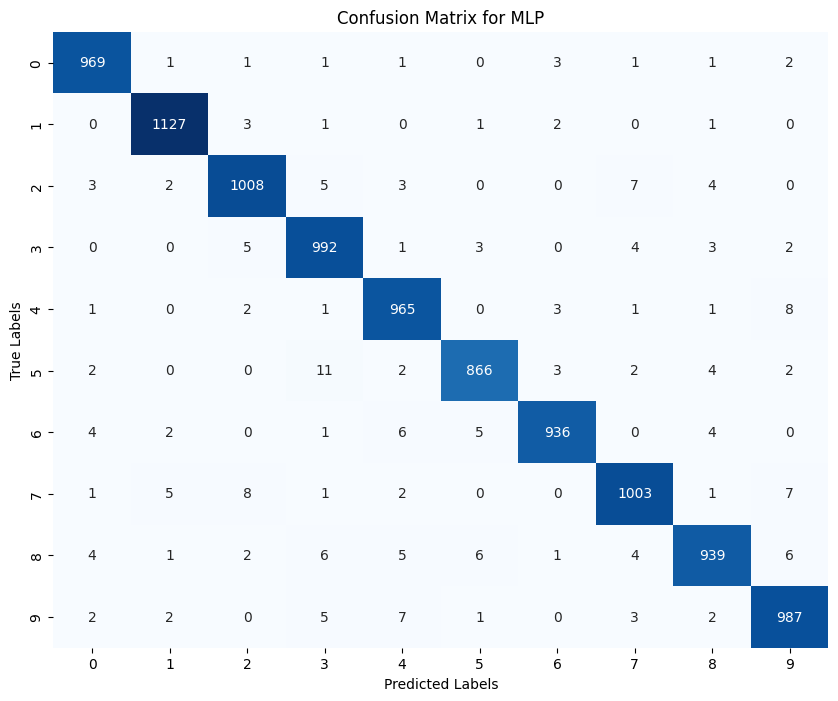

313/313 [==============================] - 1s 3ms/step - loss: 0.0733 - accuracy: 0.9792

Test loss: 0.0733

Test Accuracy: 97.92%


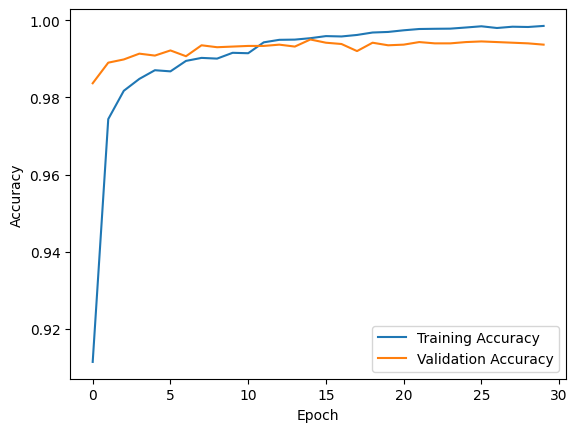

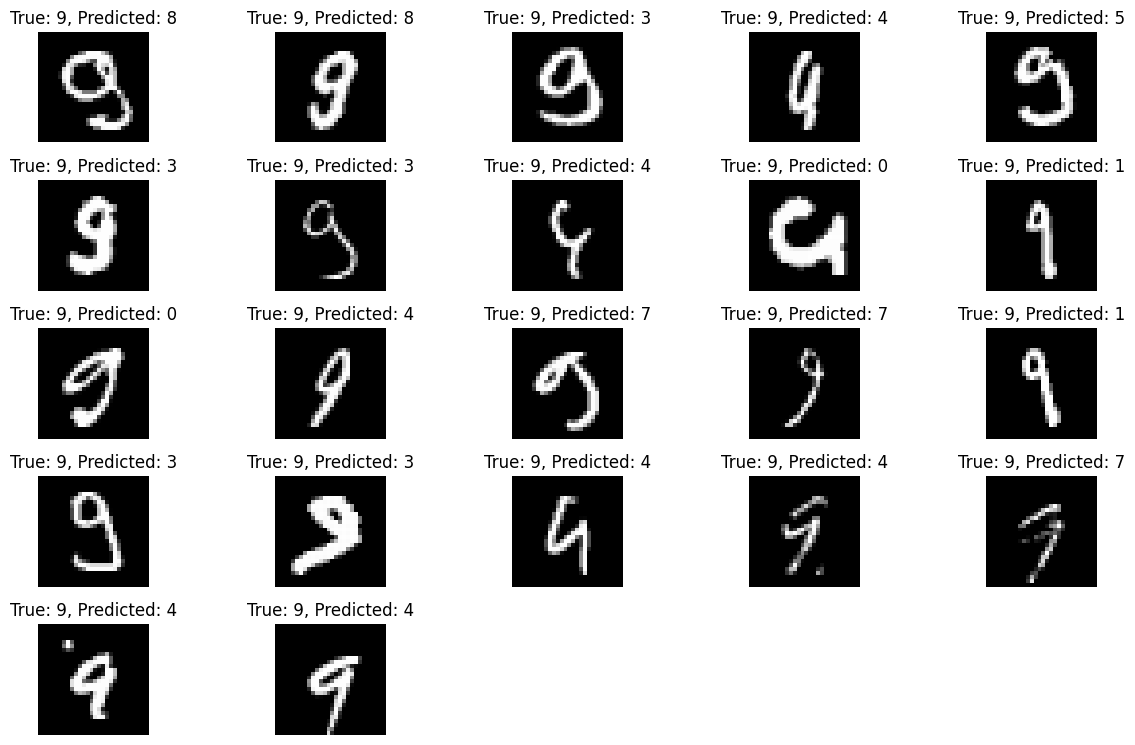

In [ ]:
# Compute confusion matrix
conf_matrix = confusion_matrix(y_keras_true_labels, y_mlp_pred_labels)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix for MLP')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

plt.show()

# Evaluate the model on the test set
mlp_test_loss, mlp_test_accuracy = mlp_model.evaluate(x_mlp_test, y_keras_test)
print(f"Test loss: {mlp_test_loss:.4f}")
print(f'Test Accuracy: {mlp_test_accuracy * 100:.2f}%')

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Find indices of misclassified instances
misclassified_indices = np.where(y_mlp_pred_labels != y_keras_true_labels)[0]

# Display some of the misclassified instances
plt.figure(figsize=(12, 12))
miss_count = 0
for i, idx in enumerate(misclassified_indices):
    if y_keras_true_labels[idx] == 9:
      plt.subplot(8, 5, miss_count + 1)
      miss_count+=1
      plt.imshow(x_test[idx].reshape(28, 28), cmap='gray')
      plt.title(f'True: {y_keras_true_labels[idx]}, Predicted: {y_mlp_pred_labels[idx]}')
    plt.axis('off')

plt.tight_layout()
plt.show()

We are goint to evaluate the digit 7 in this case of MLP.
Refer to the confusion matrix, the digit 7 would be easy to be predicted as the other number especially the number 1 and 2 due to their shapes.

This time, we can se that the digits were predicted as 7 appears alot and 7's were also predicted as the others. We can come up with precision metrics which is equalto TP/ (TP + FP) = 948/ (948 + 49) = 0.9508.



**Linear Deep Neural Network**

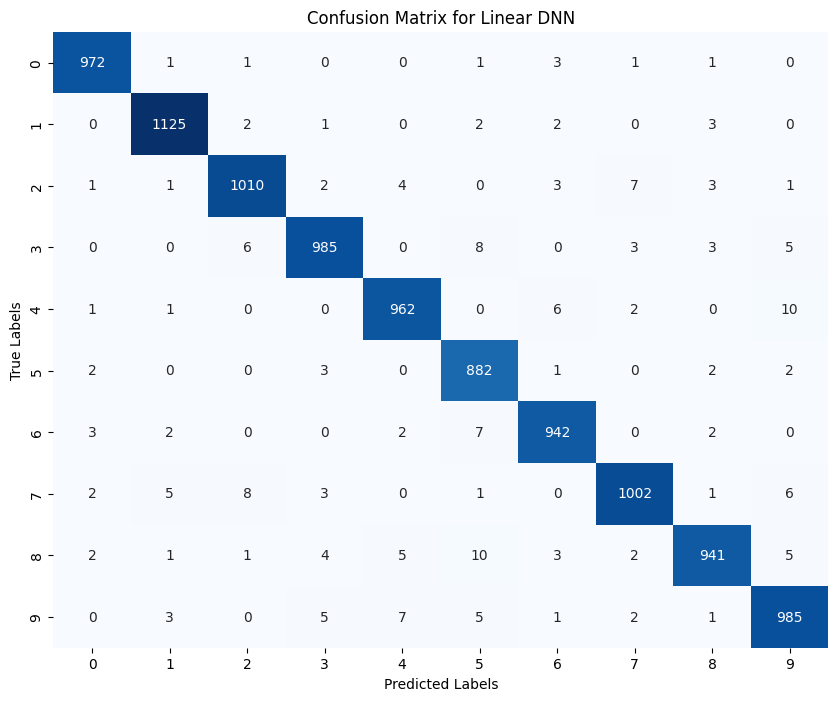

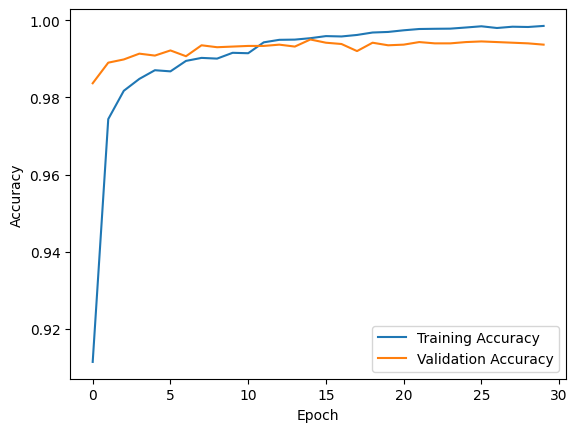

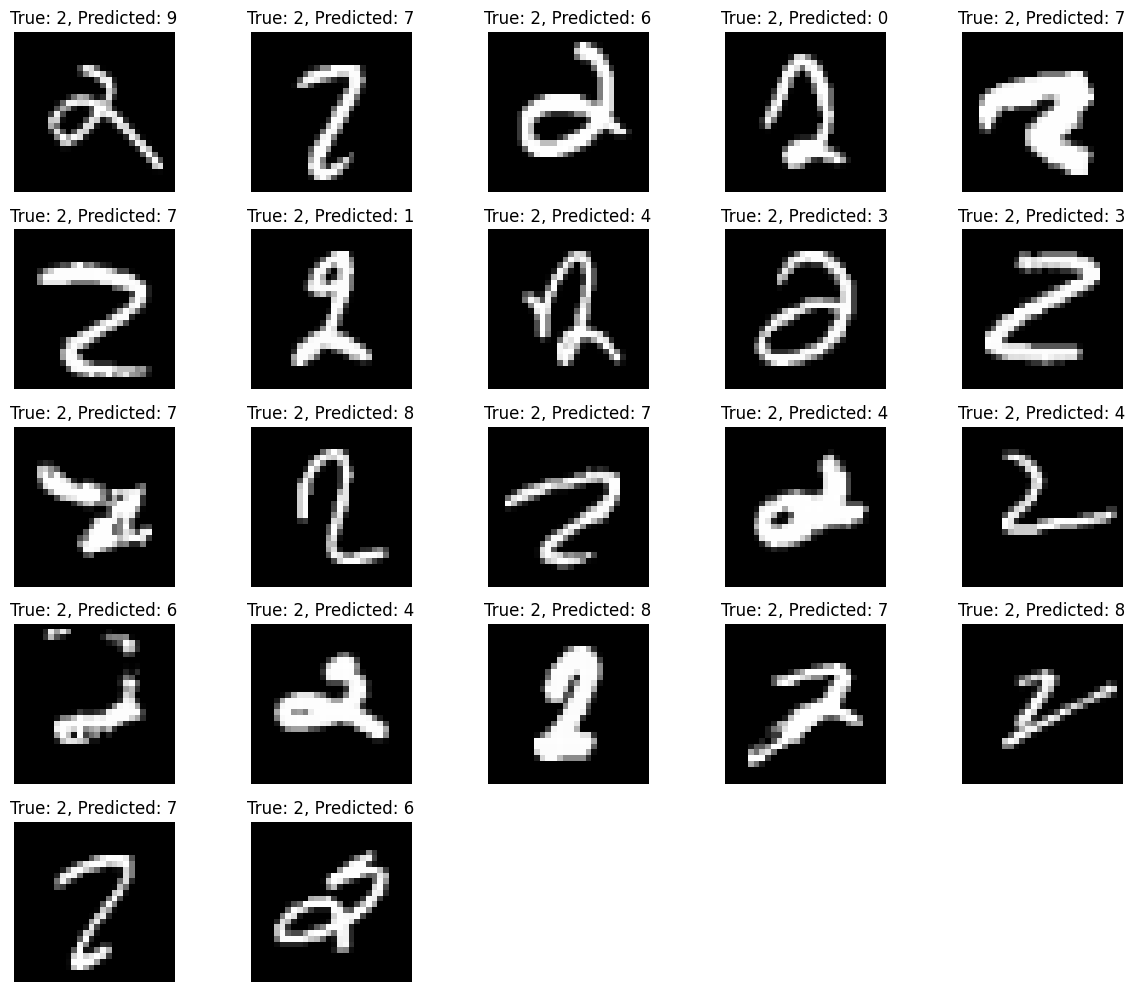

In [ ]:
# Compute confusion matrix
conf_matrix = confusion_matrix(y_keras_true_labels, y_dnn_pred_labels)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix for Linear DNN')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

plt.show()

# Plot training and validation accuracy curves

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Find indices of misclassified instances
misclassified_indices = np.where(y_dnn_pred_labels != y_keras_true_labels)[0]

# Display some of the misclassified instances
plt.figure(figsize=(12, 12))
miss_count = 0
for i, idx in enumerate(misclassified_indices):
    if y_keras_true_labels[idx] == 2:
      plt.subplot(6, 5, miss_count + 1)
      miss_count+=1
      plt.imshow(x_dnn_test[idx].reshape(28, 28), cmap='gray')
      plt.title(f'True: {y_keras_true_labels[idx]}, Predicted: {y_dnn_pred_labels[idx]}')
    plt.axis('off')

plt.tight_layout()
plt.show()

We are goint to evaluate the digit 9 in this case of Linear DNN.
This time, a lot of samples belong to digit 4 was predicted as 9, also 8's and 7's. This might be related to their similarity in shapes.

This time, we can se that the digits were predicted as 9 appears alot and 9s were also predicted as the others. We can come up with precision metrics which is equalto TP/ (TP + FP) = 987/ (987 + 53) = 0.9490.



**Convoluational Neural Network**

313/313 [==============================] - 1s 2ms/step


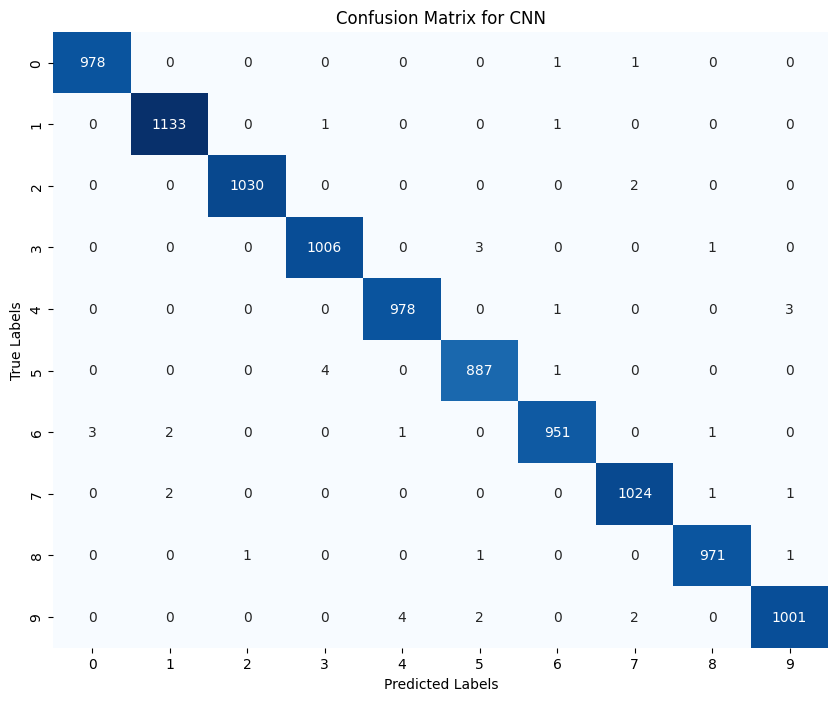

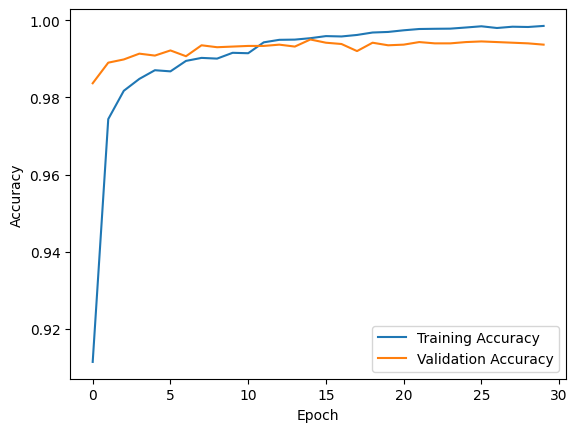

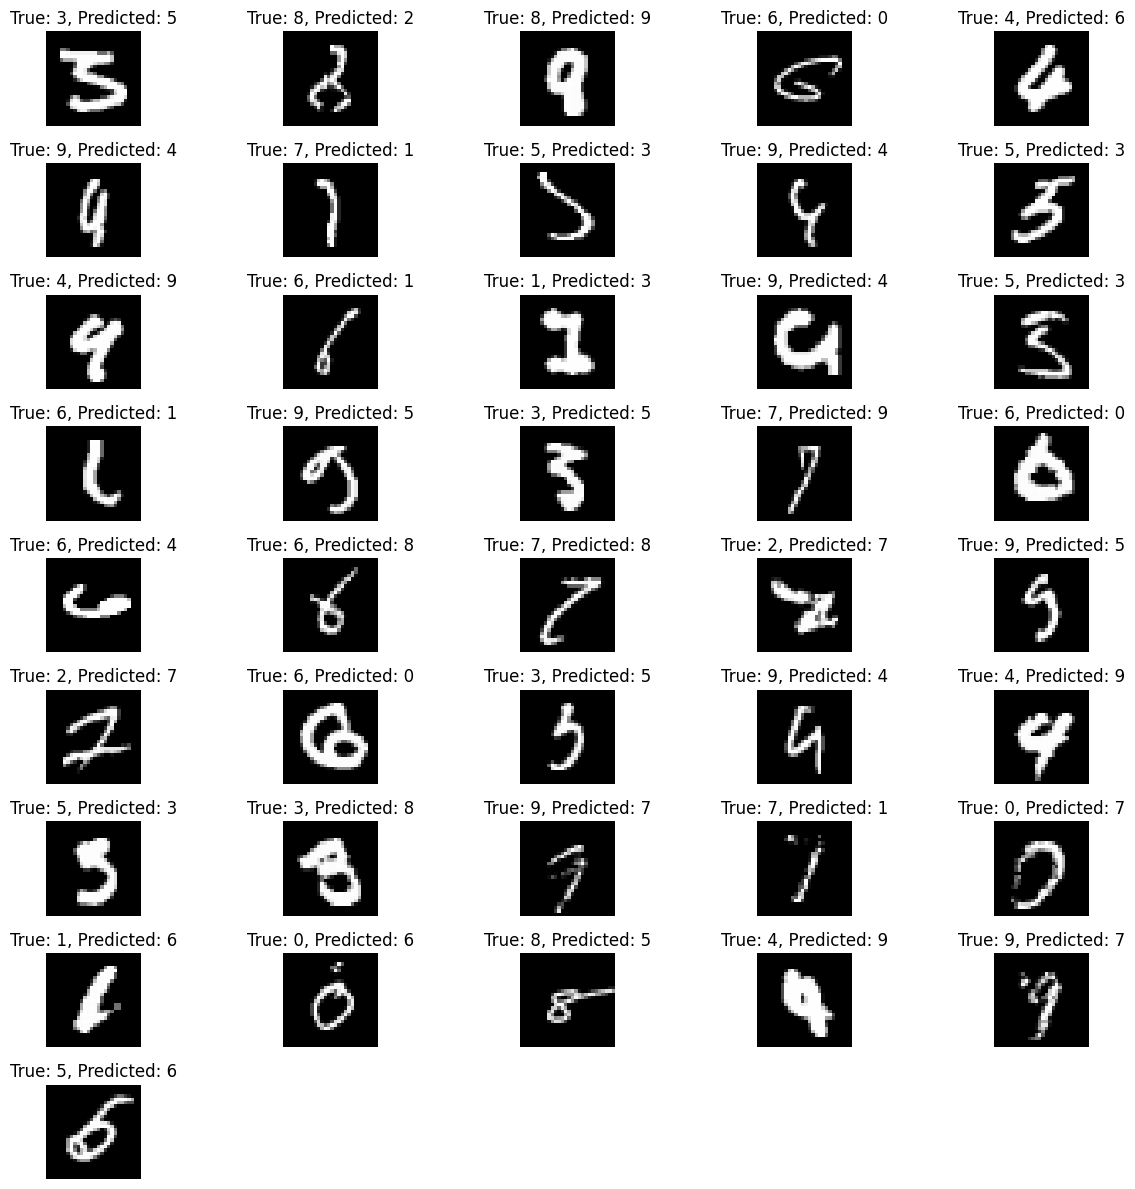

In [ ]:
# Make predictions on the test set
y_pred = cnn_model.predict(x_test)

# Convert one-hot encoded predictions to class labels
y_cnn_pred_labels = np.argmax(y_pred, axis=1)
y_keras_true_labels = np.argmax(y_keras_test, axis=1)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_keras_true_labels, y_cnn_pred_labels)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix for CNN')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

plt.show()

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# Find indices of misclassified instances
misclassified_indices = np.where(y_cnn_pred_labels != y_keras_true_labels)[0]

# Display some of the misclassified instances
plt.figure(figsize=(12, 12))
for i, idx in enumerate(misclassified_indices):
    plt.subplot(math.ceil(misclassified_indices.size / 5), 5, i + 1)
    plt.imshow(x_test[idx].reshape(28, 28), cmap='gray')
    plt.title(f'True: {y_keras_true_labels[idx]}, Predicted: {y_cnn_pred_labels[idx]}')
    plt.axis('off')

plt.tight_layout()
plt.show()

The CNN gives an impress prediction result. There's not so many times the model got a wrong prediction.

This time, we will consider the digit 5 which can be seen as the class having the most wrong prediction (both the others were predicted as 5 and 5's were predicted as others) as the meaurement. We can come up with precision metrics which is equalto TP/ (TP + FP) = 886/ (886 + 10) = 0.9888 which can be considered the best precision for the worst predicted class.




**CONCLUSION**: It is not by chance that CNN has been considered a highly effective solution in image classification. This can be attributed to the fact that CNN not only provides a solution for complex problems but also delivers the best results among the five evaluated algorithms.

# Test dataset segmentation

**Load CNN model**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pickle
import os

scores = {} # scores is an empty dict already
model_file_path = f'{assessment_path}/cnn_model_7.pkl' # use cnn_model_7.pkl which is the best model for this task
test_datasets_file_path = f'{assessment_path}/Number_Test_Data' # please change this to you test dataset file path
# if os.path.getsize(file_path) > 0:
with open(model_file_path,'rb') as handle:
  load_model = pickle.load(handle)


Mounted at /content/drive


**Common used function**

In [ ]:
def plot_image(num_rows, num_cols, images, titles = [], axis_enabled='on', figsize = (10, 10), cmap='gray'):
  fig, axes = plt.subplots(num_rows, num_cols, figsize = figsize)
  plt.subplots_adjust(hspace=0.1)
  plt.xticks([]),plt.yticks([])
  if num_rows > 1:
    for (row_i, row) in enumerate(axes):
      for (axes_i, axe) in enumerate(row):
        image_idx = row_i*num_cols + axes_i
        axe.imshow(images[image_idx], cmap=cmap) # default cmap = green
        axe.set_title(titles[image_idx]) if len(titles) > 0 and titles[image_idx] != None else axe.set_title(f"Image {image_idx + 1}")
        axe.axis(axis_enabled)
  else:
      for image_idx, axe in enumerate(axes):
        axe.imshow(images[image_idx], cmap=cmap) # default cmap = green
        axe.set_title(titles[image_idx]) if len(titles) > 0 and titles[image_idx] != None else axe.set_title(f"Image {image_idx + 1}")
        axe.axis(axis_enabled)

def plot_img_v2(row, col, figsize=(12, 12), images=[], titles=[], title_size=10):
  plt.figure(figsize=figsize)
  for i, img in enumerate(images):
      plt.subplot(row, col, i + 1)
      plt.imshow(img, cmap='gray')
      title = titles[i] if len(titles) > 0 and len(titles) >= i and titles[i] != None else f"Image {i + 1}"
      plt.title(f'{title}', fontsize = title_size)
      plt.axis('off')

  plt.tight_layout()
  plt.show()

def convert_img_grayscale(bgr_image):
  return cv.cvtColor(bgr_image.copy(), cv.COLOR_BGR2GRAY)

def convert_img_bgr(gray_image):
  return cv.cvtColor(gray_image.copy(), cv.COLOR_GRAY2BGR)

def find_contours(gray_image):
  range = cv.inRange(gray_image, 0, 30)
  return cv.findContours(range, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

def predict_image(img):
  result = load_model.predict(img)
  prediction =  np.argmax(result, axis = 1)
  confidence = np.max(result, axis = 1)
  return prediction, confidence

def crop_images_from_image(image):
  plot_img = image.copy()
  gray_image = convert_img_grayscale(image)
  conts, his_r = find_contours(gray_image)
  cropped_imgs= []
  grid_titles = []
  for idx,c in enumerate(conts):
    x, y, w, h = cv.boundingRect(c)
    cv.rectangle(plot_img, (x, y) , (x+w, y+h), (0, 255, 0), 2)
    crop_img = cv.resize(gray_image[y:y+w, x:x+h],(28, 28), interpolation=cv.INTER_AREA)
    cropped_imgs.append(crop_img)

  plt.figure(figsize=(10, 10))
  plt.axis('off')
  plt.imshow(plot_img)
  plt.title("Bounding box")

  return np.array(cropped_imgs)

def filter_then_crop_images_from_image(image):
  img_median_blur = cv.medianBlur(image.copy(), 25)
  gray_image = convert_img_grayscale(img_median_blur)
  ret, img_bin_inv = cv.threshold(gray_image.copy(), 90, 255, cv.THRESH_BINARY_INV)
  conts, his_r = find_contours(img_bin_inv)
  cropped_imgs= []
  for idx,c in enumerate(conts):
    x, y, w, h = cv.boundingRect(c)
    cv.rectangle(image, (x, y) , (x+w, y+h), (0, 255, 0), 2)
    cropped_imgs.append(img_bin_inv[y:y+w, x:x+h])
  plt.axis('off')
  plt.imshow(image)

  return cropped_imgs

def predict_single_img(img):
  img_gray = convert_img_grayscale(img.copy())
  img_gray = np.reshape(img_gray.copy(), (-1, 28, 28, 1))
  prediction, confidence = predict_image(img_gray)
  img_gray = np.reshape(img_gray, (28, 28, 1))
  plot_img_v2(1, 1, figsize=(5,5), images = [img], titles=prediction, title_size = 32)

**Visualize test dataset**

In [ ]:
import cv2 as cv
import matplotlib.pyplot as plt
import glob
import os
import numpy as np

# image file list
file_list = glob.glob(f'{test_datasets_file_path}/*.png')
file_list = sorted(file_list)
test_image = [cv.imread(file_path) for file_path in file_list]
test_image_titles= [os.path.basename(file_path) for file_path in file_list]

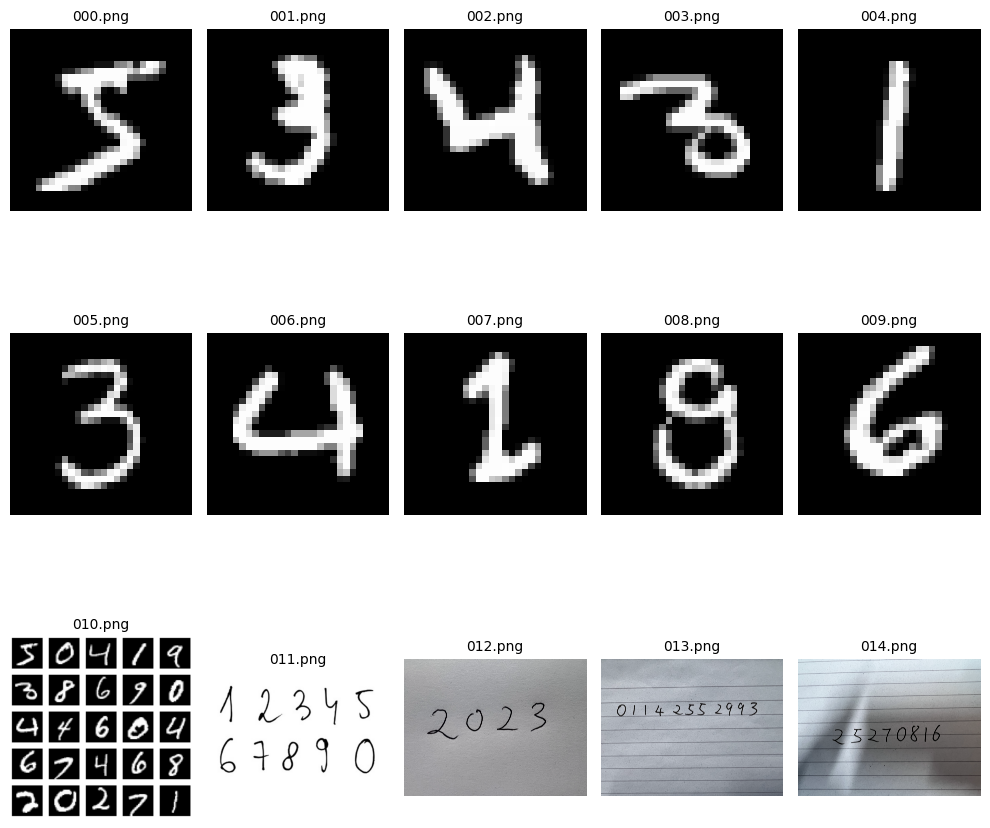

In [ ]:
plot_img_v2(3, 5, images=test_image, titles=test_image_titles, figsize = (10, 10))

**IMAGE 000.png**

1/1 [==============================] - 7s 7s/step


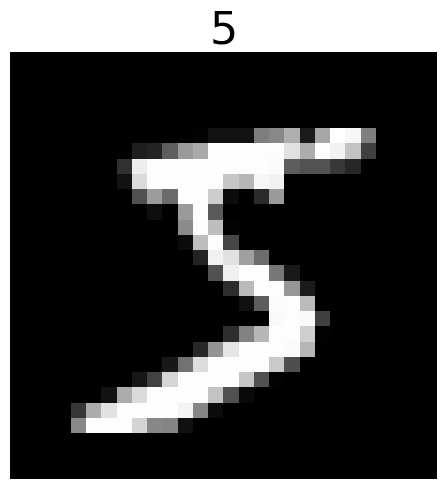

In [ ]:
predict_single_img(test_image[0].copy())

**IMAGE 001.png**

1/1 [==============================] - 0s 27ms/step


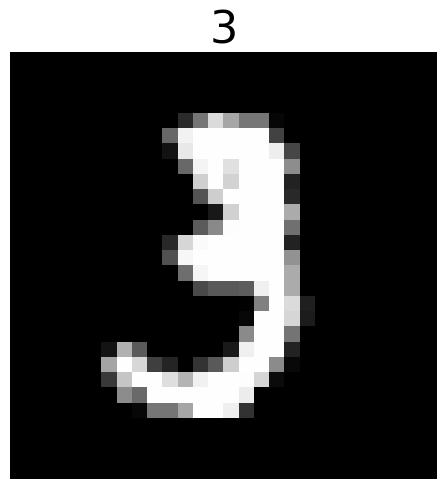

In [ ]:
predict_single_img(test_image[1].copy())

**IMAGE 002.png**

1/1 [==============================] - 0s 34ms/step


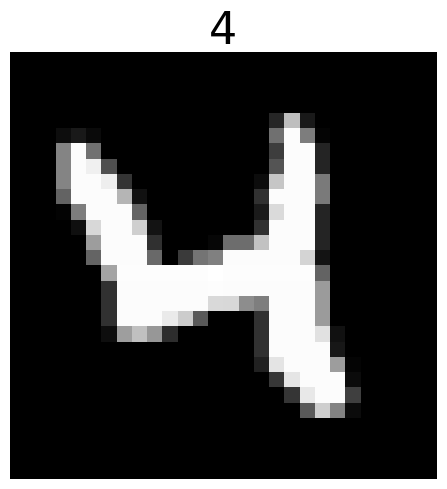

In [ ]:
predict_single_img(test_image[2].copy())

**IMAGE 003.png**

1/1 [==============================] - 0s 26ms/step


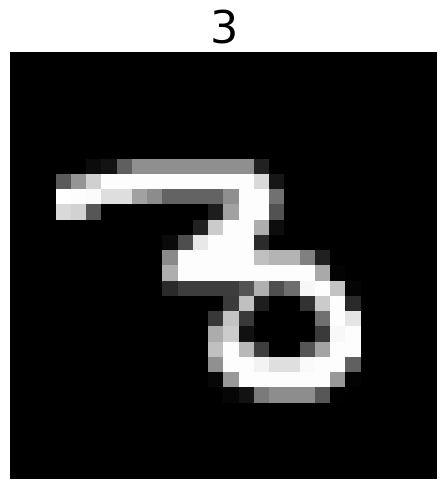

In [ ]:
predict_single_img(test_image[3].copy())

**IMAGE 004.png**

1/1 [==============================] - 0s 30ms/step


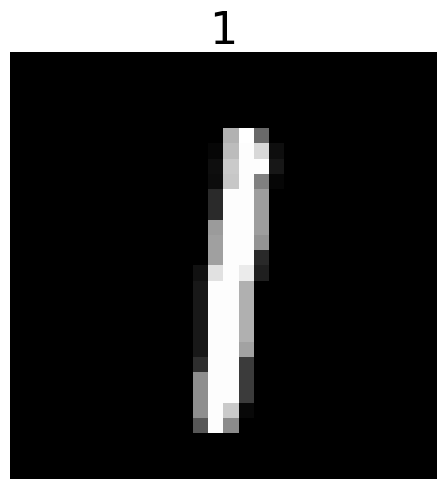

In [ ]:
predict_single_img(test_image[4].copy())

**IMAGE 005.png**

1/1 [==============================] - 0s 39ms/step


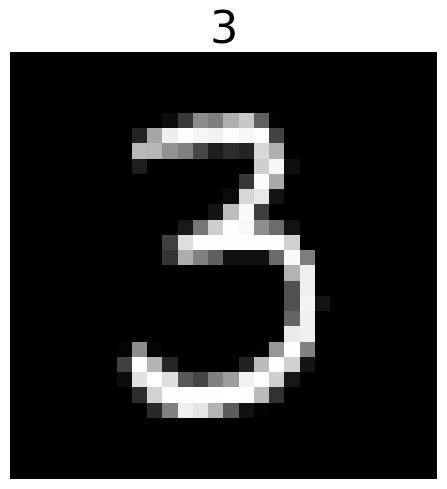

In [ ]:
predict_single_img(test_image[5].copy())

**IMAGE 006.png**

1/1 [==============================] - 0s 28ms/step


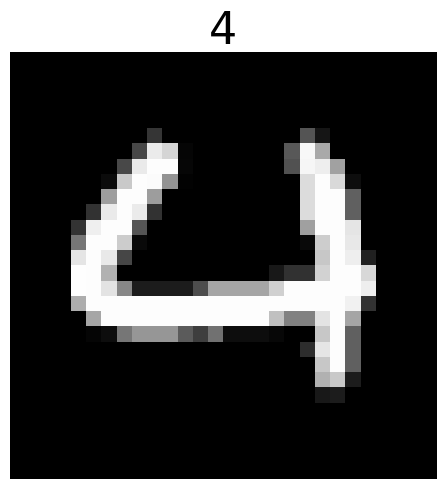

In [ ]:
predict_single_img(test_image[6].copy())

**IMAGE 007.png**

1/1 [==============================] - 0s 25ms/step


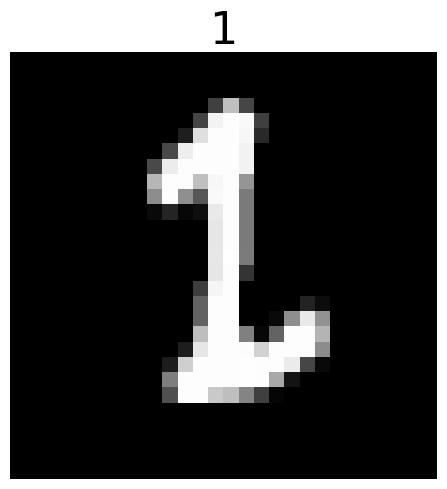

In [ ]:
predict_single_img(test_image[7].copy())

**IMAGE 008.png**

1/1 [==============================] - 0s 28ms/step


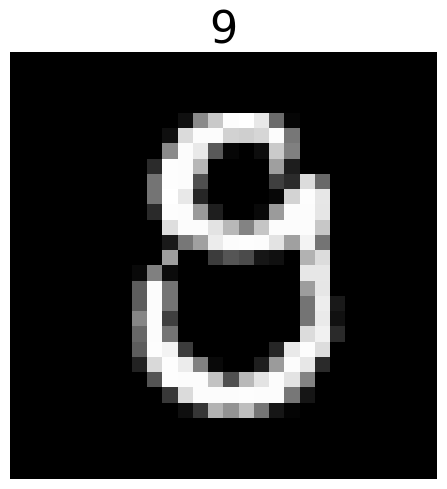

In [ ]:
img_8 = test_image[8].copy()
img_8 = convert_img_grayscale(img_8)
img_8_opening = cv.erode(img_8, (3, 3))
img_8_opening = cv.morphologyEx(img_8_opening, cv.MORPH_OPEN, (3, 3))
img_8_opening = np.reshape(img_8_opening.copy(), (-1, 28, 28, 1))
prediction, confidence = predict_image(img_8_opening)
img_8_opening = np.reshape(img_8_opening, (28, 28, 1))
plot_img_v2(1, 1, figsize=(5,5), images = [img_8], titles=prediction, title_size = 32)

**IMAGE 009.png**

1/1 [==============================] - 0s 25ms/step


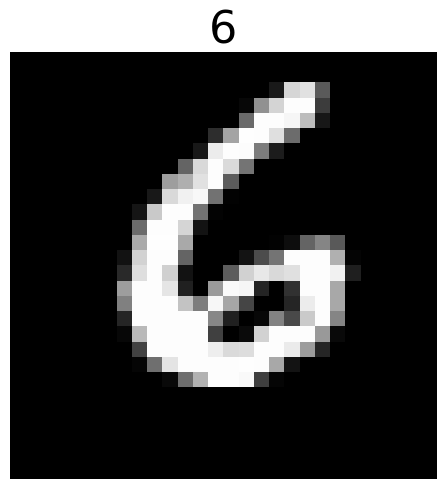

In [ ]:
predict_single_img(test_image[9].copy())

**IMAGE 010.png**

1/1 [==============================] - 0s 154ms/step


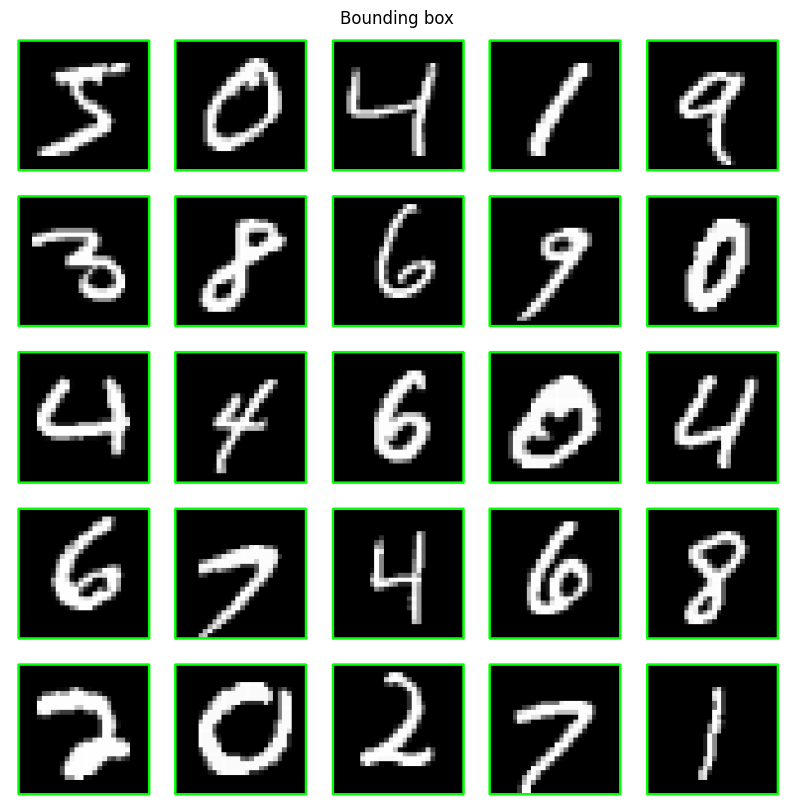

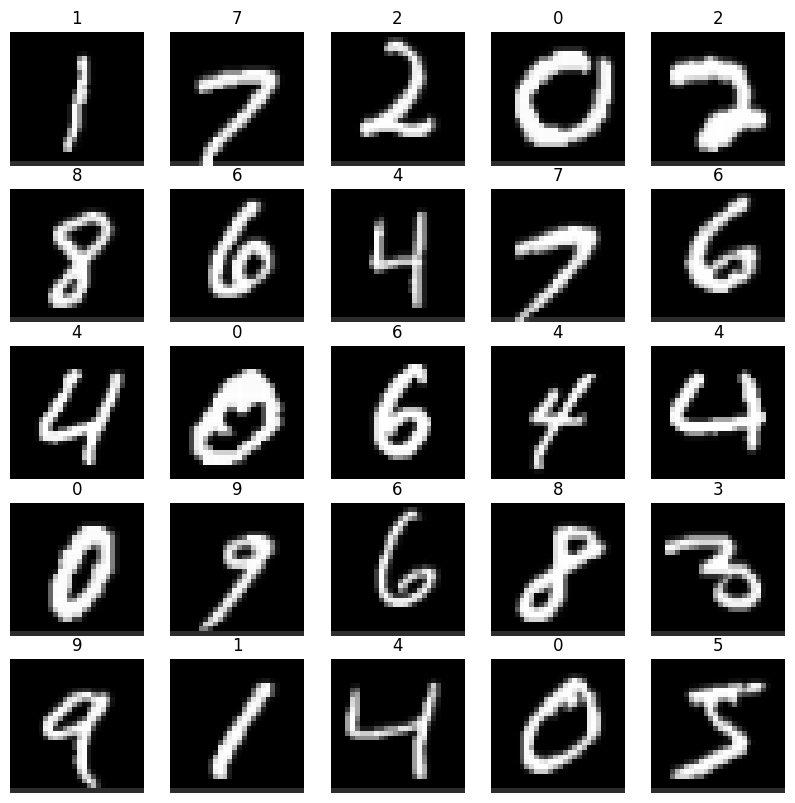

In [ ]:
import numpy as np
testing_img = test_image[10]

cropped_grid_imgs = crop_images_from_image(testing_img)
returned_values = predict_image(np.reshape(cropped_grid_imgs, (-1, 28, 28, 1)))
plot_image(num_rows=5, num_cols=5, images=cropped_grid_imgs, titles=returned_values[0], axis_enabled='off', figsize = (10, 10), cmap='gray')

# PUT TEXT ON IMAGE

**IMAGE 011**

In [ ]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
import math

def predict_digit_sequence(img, global_threshold, dilate_before_crop = False, kernel_size = (3, 3), dilasion_ite = 1, font_size = 1, font_weight=1):
  gray_img = convert_img_grayscale(img)
  ret, img_bin_inv = cv.threshold(gray_img.copy(), global_threshold, 255, cv.THRESH_BINARY_INV)

  adapt_thres_mean = cv.adaptiveThreshold(gray_img,255,cv.ADAPTIVE_THRESH_MEAN_C,\
              cv.THRESH_BINARY_INV,11,1)

  adapt_thres_gaus = cv.adaptiveThreshold(gray_img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,\
              cv.THRESH_BINARY_INV,11,1)

  if dilate_before_crop:
    img_bin_inv = cv.dilate(img_bin_inv, kernel_size, iterations = dilasion_ite)
  titles = ['Original Image', f'Global Thresholding (v = {global_threshold})',
              'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
  images = [img, img_bin_inv, adapt_thres_mean, adapt_thres_gaus]

  plot_img_v2(2, 2, (15, 15), images, titles)
  conts_1, his_r = cv.findContours(img_bin_inv, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

  plt_img = img.copy()

  cropped_imgs= []
  image_titles = []
  for idx,c in enumerate(conts_1):
    (x,y),r=cv.minEnclosingCircle(c)
    if r > 30:
      x, y, w, h = cv.boundingRect(c)
      img_size = int(h*1.2)
      y_coor = abs(int(y + h // 2 - img_size // 2))
      x_coor = abs(int(x + w // 2 - img_size // 2))
      cv.rectangle(plt_img, (x, y) , (x+w, y+h), (0, 255, 0), 3)
      crop_img = img_bin_inv[y_coor:y_coor+img_size, x_coor:x_coor+img_size]
      crop_img = cv.resize(crop_img,(28, 28), interpolation=cv.INTER_AREA)
      crop_img = cv.dilate(crop_img, (5, 5),iterations = 1)
      returned_values = predict_image(np.reshape(np.array([crop_img]), (-1, 28, 28, 1)))
      image_titles.append(f'Predicted: {str(returned_values[0][0])}')
      cv.putText(plt_img, str(returned_values[0][0]), (x, y),cv.FONT_HERSHEY_DUPLEX, font_size, (0, 0, 255), font_weight)

      cropped_imgs.append(crop_img)
  plt.axis('off')

  cropped_imgs = np.array(cropped_imgs)
  row = 1
  col = cropped_imgs.shape[0]
  if cropped_imgs.shape[0] > 5:
    col = 5
    row = math.ceil(cropped_imgs.shape[0]/5)

  plot_img_v2(row, col, images = cropped_imgs, titles=image_titles)

  plot_img_v2(1, 1, figsize=(15,15), images = [plt_img], titles=['Digit recognition'])

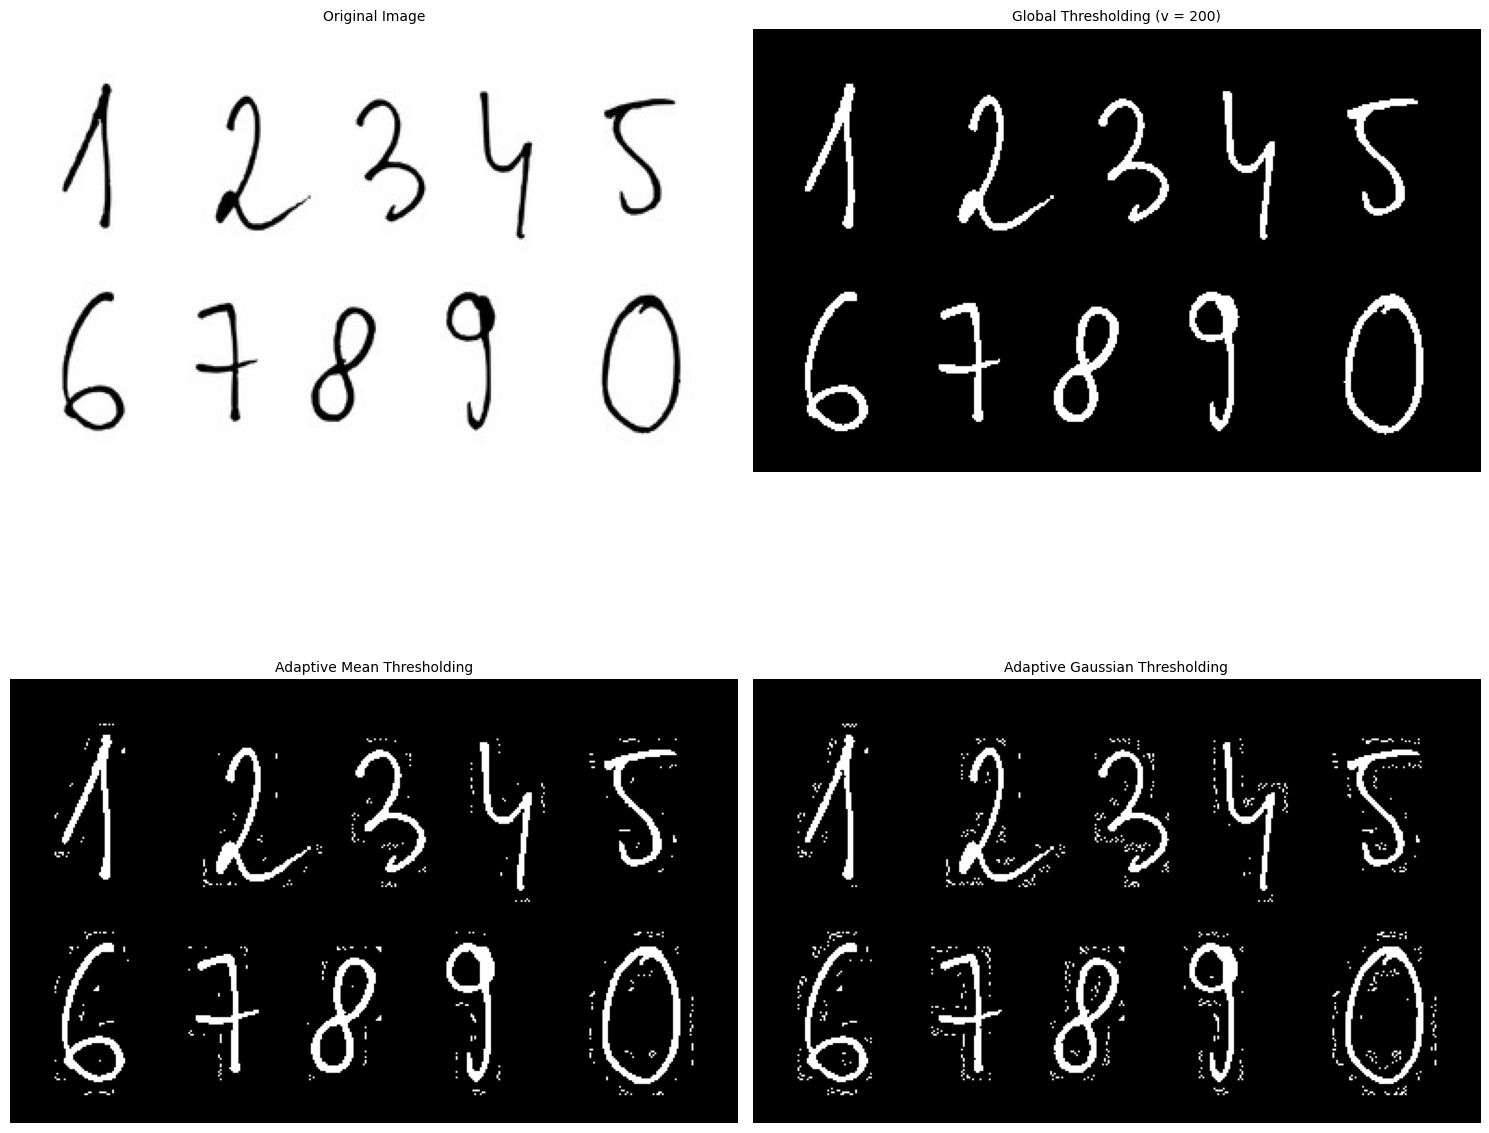

1/1 [==============================] - 0s 17ms/step

1/1 [==============================] - 0s 17ms/step

1/1 [==============================] - 0s 17ms/step

1/1 [==============================] - 0s 20ms/step

1/1 [==============================] - 0s 17ms/step

1/1 [==============================] - 0s 22ms/step

1/1 [==============================] - 0s 16ms/step

1/1 [==============================] - 0s 17ms/step

1/1 [==============================] - 0s 18ms/step

1/1 [==============================] - 0s 18ms/step


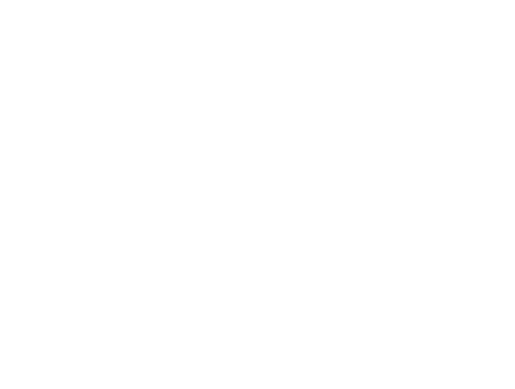

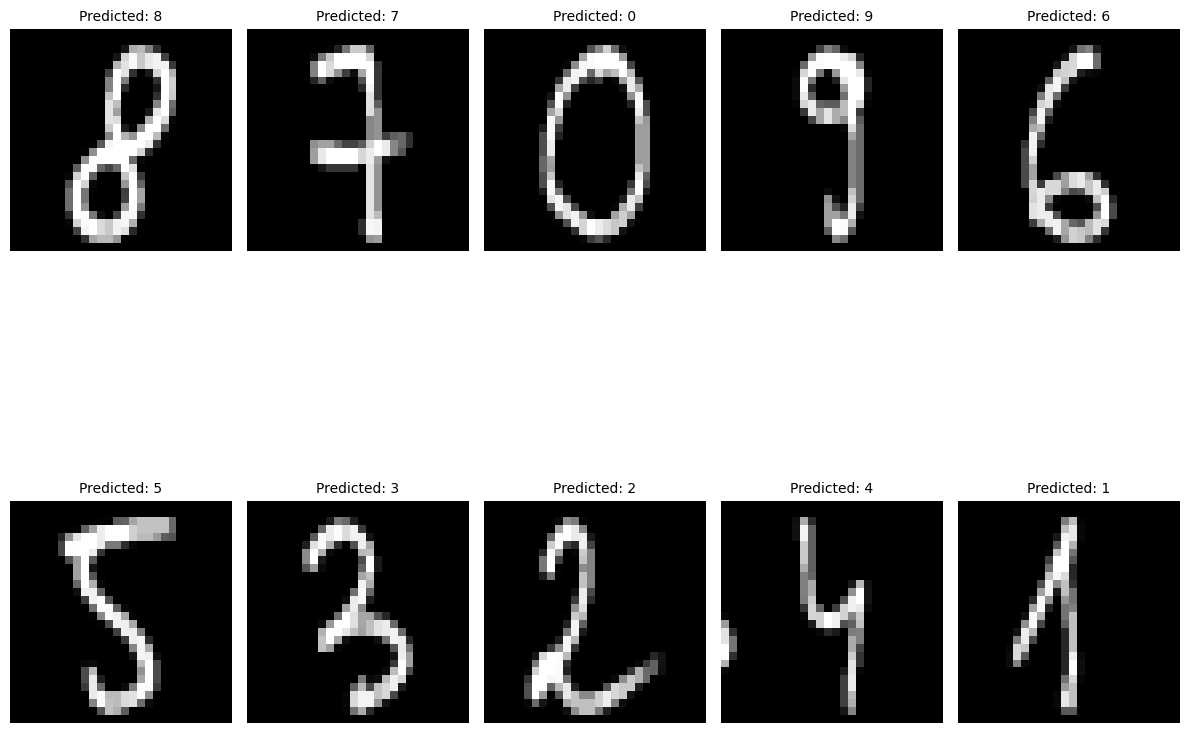

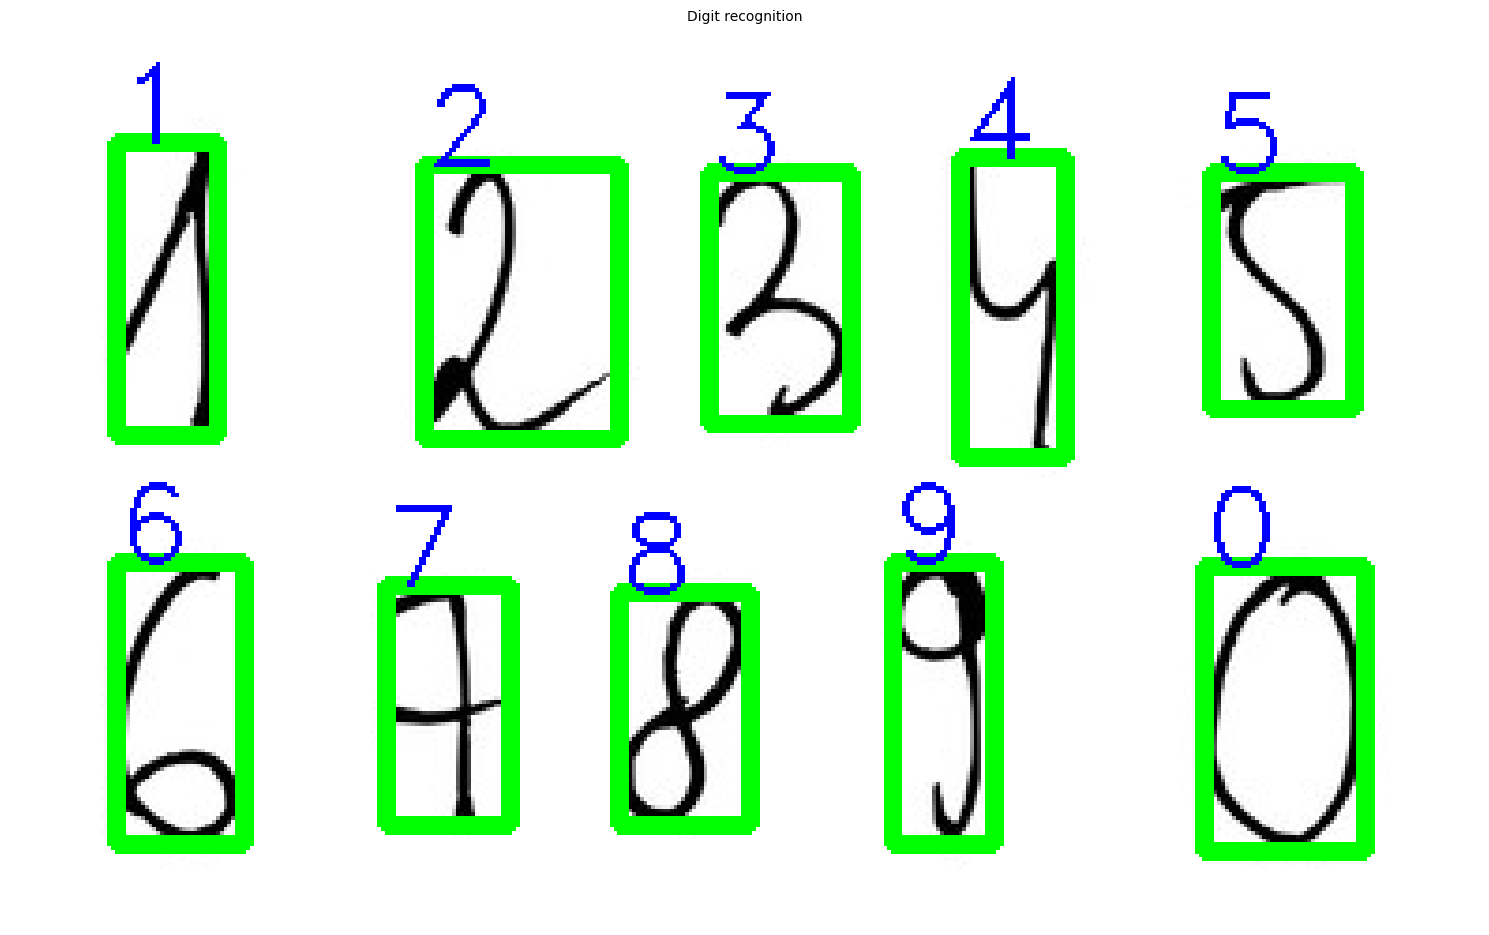

In [ ]:
predict_digit_sequence(test_image[11], global_threshold = 200)

**IMAGE 012.PNG**

In [ ]:
predict_digit_sequence(test_image[12], global_threshold=50, font_size = 14, font_weight=5)

**IMAGE 013.png**

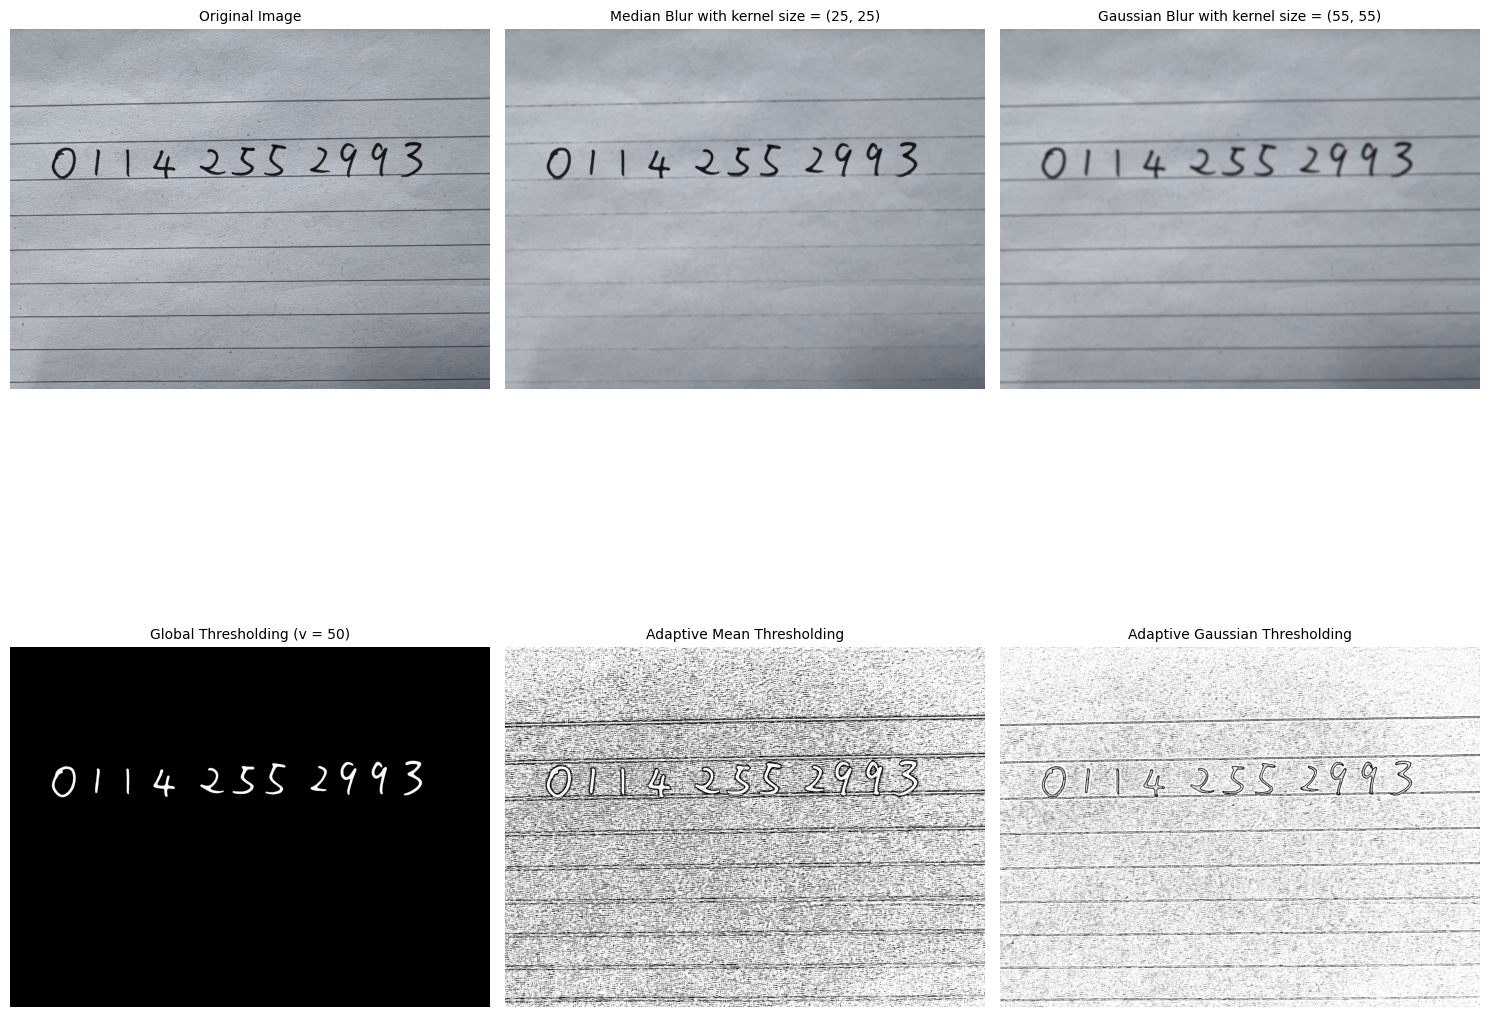

In [ ]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

img_13 = test_image[13]

img_gaussian_blur = cv.GaussianBlur(img_13.copy(), (55, 55),0)
img_median_blur = cv.medianBlur(img_13.copy(), 25)
img_gray_med_blur = convert_img_grayscale(img_median_blur.copy())

ret, img_13_bin_inv = cv.threshold(img_gray_med_blur.copy(), 50, 255, cv.THRESH_BINARY_INV)

img_mean_adapt_thres = cv.adaptiveThreshold(img_gray_med_blur,255,cv.ADAPTIVE_THRESH_MEAN_C,\
            cv.THRESH_BINARY_INV,11,0)

img_gaussian_adapt_thres = cv.adaptiveThreshold(img_gray_med_blur,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv.THRESH_BINARY,11,1)


titles = ['Original Image', 'Median Blur with kernel size = (25, 25)', 'Gaussian Blur with kernel size = (55, 55)', 'Global Thresholding (v = 50)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img_13, img_median_blur, img_gaussian_blur , img_13_bin_inv, img_mean_adapt_thres, img_gaussian_adapt_thres]

plot_img_v2(2, 3, (15, 15), images, titles)

In [ ]:
# sp (spatial window radius): A parameter specifying the spatial window radius. It influences the spatial neighborhood considered during clustering. Larger values result in larger regions being considered similar.
# sr (color window radius): A parameter specifying the color window radius. It influences the color similarity between pixels. Larger values result in more color variations being considered similar.

conts_1, his_r = cv.findContours(img_13_bin_inv, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

plt_img = img_13.copy()

cropped_imgs= []
image_titles = []
for idx,c in enumerate(conts_1):
  x, y, w, h = cv.boundingRect(c)
  img_size = int(h*1.2)
  y_coor = abs(int(y + h // 2 - img_size // 2))
  x_coor = abs(int(x + w // 2 - img_size // 2))
  cv.rectangle(plt_img, (x, y) , (x+w, y+h), (0, 255, 0), 3)
  crop_img = img_13_bin_inv[y_coor:y_coor+img_size, x_coor:x_coor+img_size]
  crop_img = cv.resize(crop_img,(28, 28), interpolation=cv.INTER_AREA)
  crop_img = cv.dilate(crop_img, (5,5),iterations = 2)
  returned_values = predict_image(np.reshape(np.array([crop_img]), (-1, 28, 28, 1)))
  image_titles.append(f'Predicted: {str(returned_values[0][0])}')
  cv.putText(plt_img, str(returned_values[0][0]), (x, y),cv.FONT_HERSHEY_DUPLEX, 2, (0, 0, 255), 3)

  cropped_imgs.append(crop_img)
plt.axis('off')

cropped_imgs = np.array(cropped_imgs)

plot_img_v2(4, 3, images = cropped_imgs, titles=image_titles)

plot_img_v2(1, 1, figsize=(25,25), images = [plt_img], titles=['Digit recognition'])



**IMAGE 14**

In [ ]:
img_14 = test_image[14]

img_gaussian_blur = cv.GaussianBlur(img_14.copy(), (55, 55), 0)
gray_image = convert_img_grayscale(img_14.copy())
img_median_blur = cv.medianBlur(gray_image, 25)

ret, img_14_bin_inv = cv.threshold(img_median_blur.copy(), 50, 255, cv.THRESH_BINARY_INV)

conts_1, his_r = cv.findContours(img_14_bin_inv, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

plt_img = img_14.copy()

img_mean_adapt_thres = cv.adaptiveThreshold(img_median_blur.copy(), 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY_INV, 21, 2)
img_gaussian_adapt_thres = cv.adaptiveThreshold(img_median_blur.copy(), 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY_INV, 21, 2)

conts_1, his_r = cv.findContours(img_14_bin_inv, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

cropped_imgs= []
cropped_titles= []
for idx,c in enumerate(conts_1):
  x, y, w, h = cv.boundingRect(c)
  img_size = int(h*1.2)
  y_coor = abs(int(y + h // 2 - img_size // 2))
  x_coor = abs(int(x + w // 2 - img_size // 2))
  cv.rectangle(plt_img, (x, y) , (x+w, y+h), (0, 255, 0), 3)
  crop_img = img_14_bin_inv[y_coor:y_coor+img_size, x_coor:x_coor+img_size]
  crop_img = cv.resize(crop_img,(28, 28), interpolation=cv.INTER_AREA)
  returned_values = predict_image(np.reshape(np.array([crop_img]), (-1, 28, 28, 1)))
  cropped_titles.append(f'Predicted: {str(returned_values[0][0])}')
  cv.putText(plt_img, str(returned_values[0][0]), (x, y),cv.FONT_HERSHEY_DUPLEX, 2, (0, 0, 255), 3)

  cropped_imgs.append(crop_img)
plt.axis('off')

titles = ['Original Image', 'Median Blur with kernel size = (25, 25)', 'Gaussian Blur with kernel size = (55, 55)', 'Global Thresholding (v = 50)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']

plot_img_v2(2, 3, images = [img_14, img_median_blur, img_gaussian_blur, img_14_bin_inv, img_mean_adapt_thres, img_gaussian_adapt_thres], titles=titles)
plot_img_v2(2, 4, images = cropped_imgs, titles=cropped_titles)

plot_img_v2(1, 1, figsize=(25,25), images = [plt_img], titles=['Digit recognition'])


**VIDEO SEGMENTATION**

In [ ]:
import numpy as np
import cv2 as cv

cap = cv.VideoCapture(f'{test_datasets_file_path}/015.avi')
predicting_frames = []
frames = []
# fps = int(cap.get(cv.CAP_PROP_FPS))
frame_counter = 0

while cap.isOpened():
    frame_counter+=1
    ret, frame = cap.read()
    frames.append(frame)
    # if frame is read correctly ret is True
    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        break
    if frame_counter % 10 == 0:
      predicting_frames.append(frame)
    # Check if it's time to save this frame (every second)
    # if int(cap.get(cv.CAP_PROP_POS_FRAMES)) % fps == 0:
    #     frames.append(frame)
        # current_second += 1

    if cv.waitKey(1) == ord('q'):
        break
cap.release()


Can't receive frame (stream end?). Exiting ...


In [ ]:
kernel_dilation = np.ones((5, 3),np.uint8)
kernel_opening = np.ones((3,1),np.uint8)

def add_padding(img):
  img_shape = img.shape
  w_h_diff = int((img_shape[0] - img_shape[1]) / 2)

  if w_h_diff < 0:
    w_h_diff = abs(w_h_diff)
    padded_image = cv.copyMakeBorder(img, w_h_diff, w_h_diff, 0, 0, cv.BORDER_CONSTANT)
  else:
    padded_image = cv.copyMakeBorder(img, 0, 0, w_h_diff, w_h_diff, cv.BORDER_CONSTANT)

  return padded_image

plot_titles = []
plot_frames = []

# OUTPUT_VIDEO_PATH = '/content/drive/MyDrive/MACHINE LEARNING AND COMPUTER VISION/ASSESSMENT/output_flowfield.avi'

# fourcc = cv.VideoWriter_fourcc(*"XVID") #'X', 'V', 'I', 'D'

# writer_output = cv.VideoWriter(OUTPUT_VIDEO_PATH, fourcc, 10, (frames[0].shape[1], frames[0].shape[0]), True)

print('--------------------- Start predicting ---------------------')

for i, frame in enumerate(predicting_frames):
  if frame is not None:
    frame_gaussian_blur = cv.GaussianBlur(frame.copy(), (5, 5), 0)
    frame_grayscale = convert_img_grayscale(frame.copy())
    frame_median_blur = cv.medianBlur(frame, 7)

    frame_ms=cv.pyrMeanShiftFiltering(frame_gaussian_blur.copy(),sp=5,sr=30)

    frame_ms_gray = convert_img_grayscale(frame_ms.copy())

    gray_median_blur_img = convert_img_grayscale(frame_median_blur.copy())

    frame_adapt = cv.adaptiveThreshold(frame_ms_gray.copy(), 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY_INV, 7, 2)


    opening_img = cv.morphologyEx(frame_adapt, cv.MORPH_OPEN, kernel_opening)
    dilation_img = cv.dilate(opening_img, kernel_dilation,iterations = 1)


    conts_1, his_r = cv.findContours(dilation_img, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

    plt_frame = cv.cvtColor(frame.copy(), cv.COLOR_BGR2RGB)

    for idx,c in enumerate(conts_1):
      (x,y),r=cv.minEnclosingCircle(c)
      if r > 15 and r < 30:
        x, y, w, h = cv.boundingRect(c)
        img_size = int(h*1.2)
        y_coor = abs(int(y + h // 2 - img_size // 2))
        x_coor = abs(int(x + w // 2 - img_size // 2))
        cv.rectangle(plt_frame, (x, y) , (x+w, y+h), (0, 255, 0), 3)
        crop_obj_img = dilation_img[y_coor:y_coor+img_size, x_coor:x_coor+img_size]
        crop_obj_img = add_padding(crop_obj_img)
        crop_obj_img = cv.resize(crop_obj_img,(28, 28), interpolation=cv.INTER_AREA)
        crop_obj_img = cv.dilate(crop_obj_img, (3, 3),iterations = 1)
        prediction, confidence_level = predict_image(np.reshape(np.array([crop_obj_img]), (-1, 28, 28, 1)))
        if confidence_level == 1.0:
          cv.putText(plt_frame, str(prediction[0]), (x, y), cv.FONT_HERSHEY_DUPLEX, 2, (0, 0, 255), 3)

    plt.axis('off')
    # if i % 10 == 0 and int(i/10) < len(predicting_frames):
    plot_frames.append([frame_adapt, opening_img, dilation_img, plt_frame])
    plot_titles.append(['gaussian_adaptive_threshold', 'opening_img', 'dilation_img', f'frame_{i}_recognition'])

    # writer_output.write(cv.cvtColor(plt_frame, cv.COLOR_BGR2RGB))

print('--------------------- Finish predicting ---------------------')

# writer_output.release()

for i, plot_imgs in enumerate(plot_frames):
  plot_img_v2(1,4, images = plot_imgs, titles=plot_titles[i], figsize=(25, 25))